#  House Price Prediction in Mumbai

In [1]:
#Importing the necessary Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns',None)
plt.style.use("fivethirtyeight")

**Reading the Dataset:**

In [2]:
df = pd.read_csv('House_Price_Mumbai.csv')
df.head(3)

,Unnamed: 0,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,Longitude,Latitude,Price,Size,Sub_urban_ID,Sub_urban_name,description,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,237757,Liberty Bay Vue,15575892,Apartment,Under Construction,"21,000",1 day ago,https://www.makaan.com/mumbai/liberty-group-mu...,678874.0,Liberty Group Mumbai,ACTIVE,18,Mumbai,2 BHK,50028,Malad West,72.816399,19.196890,"1,54,98,000",738 sq ft,10042,Andheri to Dahisar,Well designed 2 bhk multistorey apartment is a...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,237758,Shree Krupa Nandanvan Homes Building B,15572085,Apartment,Under Construction,"21,082",2 days ago,https://www.makaan.com/mumbai/shree-krupa-buil...,102974.0,Shree Krupa Builders,ACTIVE,18,Mumbai,3 BHK,50063,Thane West,72.985039,19.225548,"1,87,00,000",887 sq ft,10048,Thane,Its a 3 bhk multistorey apartment situated in...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,237759,Dev Drashti Empire Phase 1,10378461,Apartment,Under Construction,"5,200",2 days ago,https://www.makaan.com/mumbai/dev-drashti-grou...,2022899.0,Dev Drashti Group,ACTIVE,18,Mumbai,2 BHK,51250,Bhiwandi,73.049629,19.271364,"56,16,000","1,080 sq ft",10043,Beyond Thane,A 2 bhk property is available for sale in Dev ...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


In [3]:
del df['Unnamed: 0']

**Understanding the Dataset:**

In [4]:
df.shape

(94339, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94339 entries, 0 to 94338
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Property_Name             74903 non-null  object 
 1   Property_id               94339 non-null  int64  
 2   Property_type             94339 non-null  object 
 3   Property_status           94203 non-null  object 
 4   Price_per_unit_area       94339 non-null  object 
 5   Posted_On                 94339 non-null  object 
 6   Project_URL               94339 non-null  object 
 7   builder_id                72171 non-null  float64
 8   Builder_name              72171 non-null  object 
 9   Property_building_status  94339 non-null  object 
 10  City_id                   94339 non-null  int64  
 11  City_name                 94339 non-null  object 
 12  No_of_BHK                 94339 non-null  object 
 13  Locality_ID               94339 non-null  int64  
 14  Locali

In [6]:
df.columns

Index(['Property_Name', 'Property_id', 'Property_type', 'Property_status',
       'Price_per_unit_area', 'Posted_On', 'Project_URL', 'builder_id',
       'Builder_name', 'Property_building_status', 'City_id', 'City_name',
       'No_of_BHK', 'Locality_ID', 'Locality_Name', 'Longitude', 'Latitude',
       'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'description',
       'is_furnished', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category'],
      dtype='object')

* **The dataset has 17 categorical, 8 numerical and 7 boolean features.**
* **Here Price is our Target Variable.We need to convert Price and other features into numerical data types**

In [7]:
#Checking for features with null values
df.isnull().sum()[df.isnull().sum()!=0]

Property_Name      19436
Property_status      136
builder_id         22168
Builder_name       22168
Locality_Name          2
dtype: int64

In [8]:
df = df.drop_duplicates()

In [9]:
df.Price = df.Price.str.replace(',','').astype('int')

In [10]:
df.Size = df.Size.str.replace(',','').str.replace('sq ft','').astype('int')

In [11]:
df.Price_per_unit_area = df.Price_per_unit_area.str.replace(',','').astype('int')

In [12]:
df = df.drop(['Posted_On','Project_URL','City_id','City_name','Longitude','Latitude',
              'description','listing_domain_score','Listing_Category','is_commercial_Listing'],axis=1)

* We have dropped the following features as we could not extract any  intelligence from these features for
our model building. 
* These features do not possess any significance in this scenario.

In [13]:
df.head(1)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio
0,Liberty Bay Vue,15575892,Apartment,Under Construction,21000,678874.0,Liberty Group Mumbai,ACTIVE,2 BHK,50028,Malad West,15498000,738,10042,Andheri to Dahisar,Unfurnished,False,True,True,False,False,False


In [14]:
df.columns

Index(['Property_Name', 'Property_id', 'Property_type', 'Property_status',
       'Price_per_unit_area', 'builder_id', 'Builder_name',
       'Property_building_status', 'No_of_BHK', 'Locality_ID', 'Locality_Name',
       'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'is_furnished',
       'is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move',
       'is_PentaHouse', 'is_studio'],
      dtype='object')

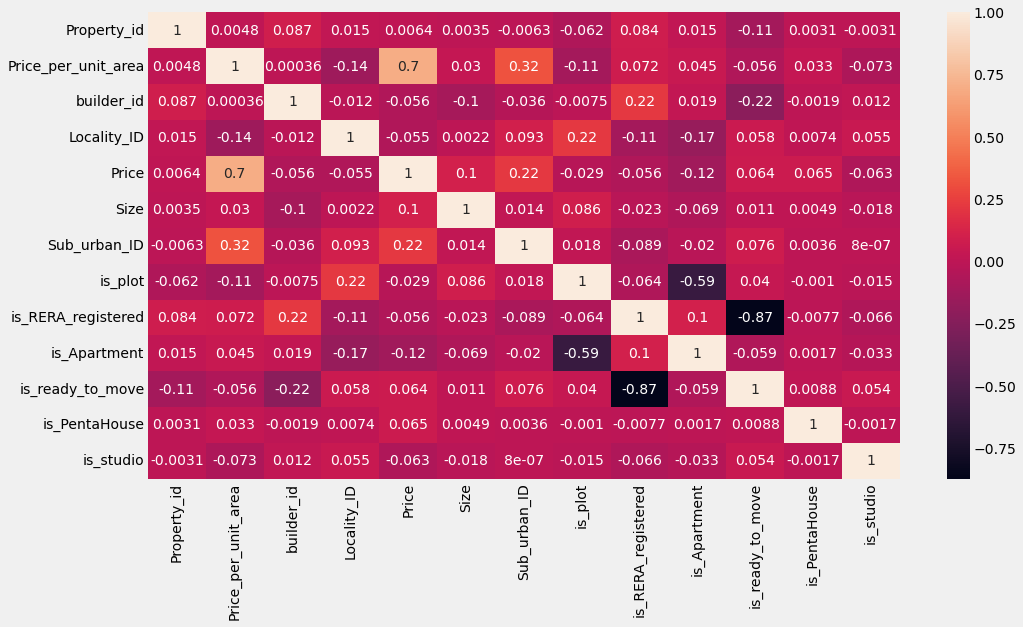

In [15]:
#Checking the correlation of features
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
df.head(1)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio
0,Liberty Bay Vue,15575892,Apartment,Under Construction,21000,678874.0,Liberty Group Mumbai,ACTIVE,2 BHK,50028,Malad West,15498000,738,10042,Andheri to Dahisar,Unfurnished,False,True,True,False,False,False


**UniVariate Analysis:**

Property_id             -1.721722
Price_per_unit_area      2.930739
builder_id               3.261603
Locality_ID              6.660635
Price                   14.112875
Size                   183.765569
Sub_urban_ID             5.156539
dtype: float64


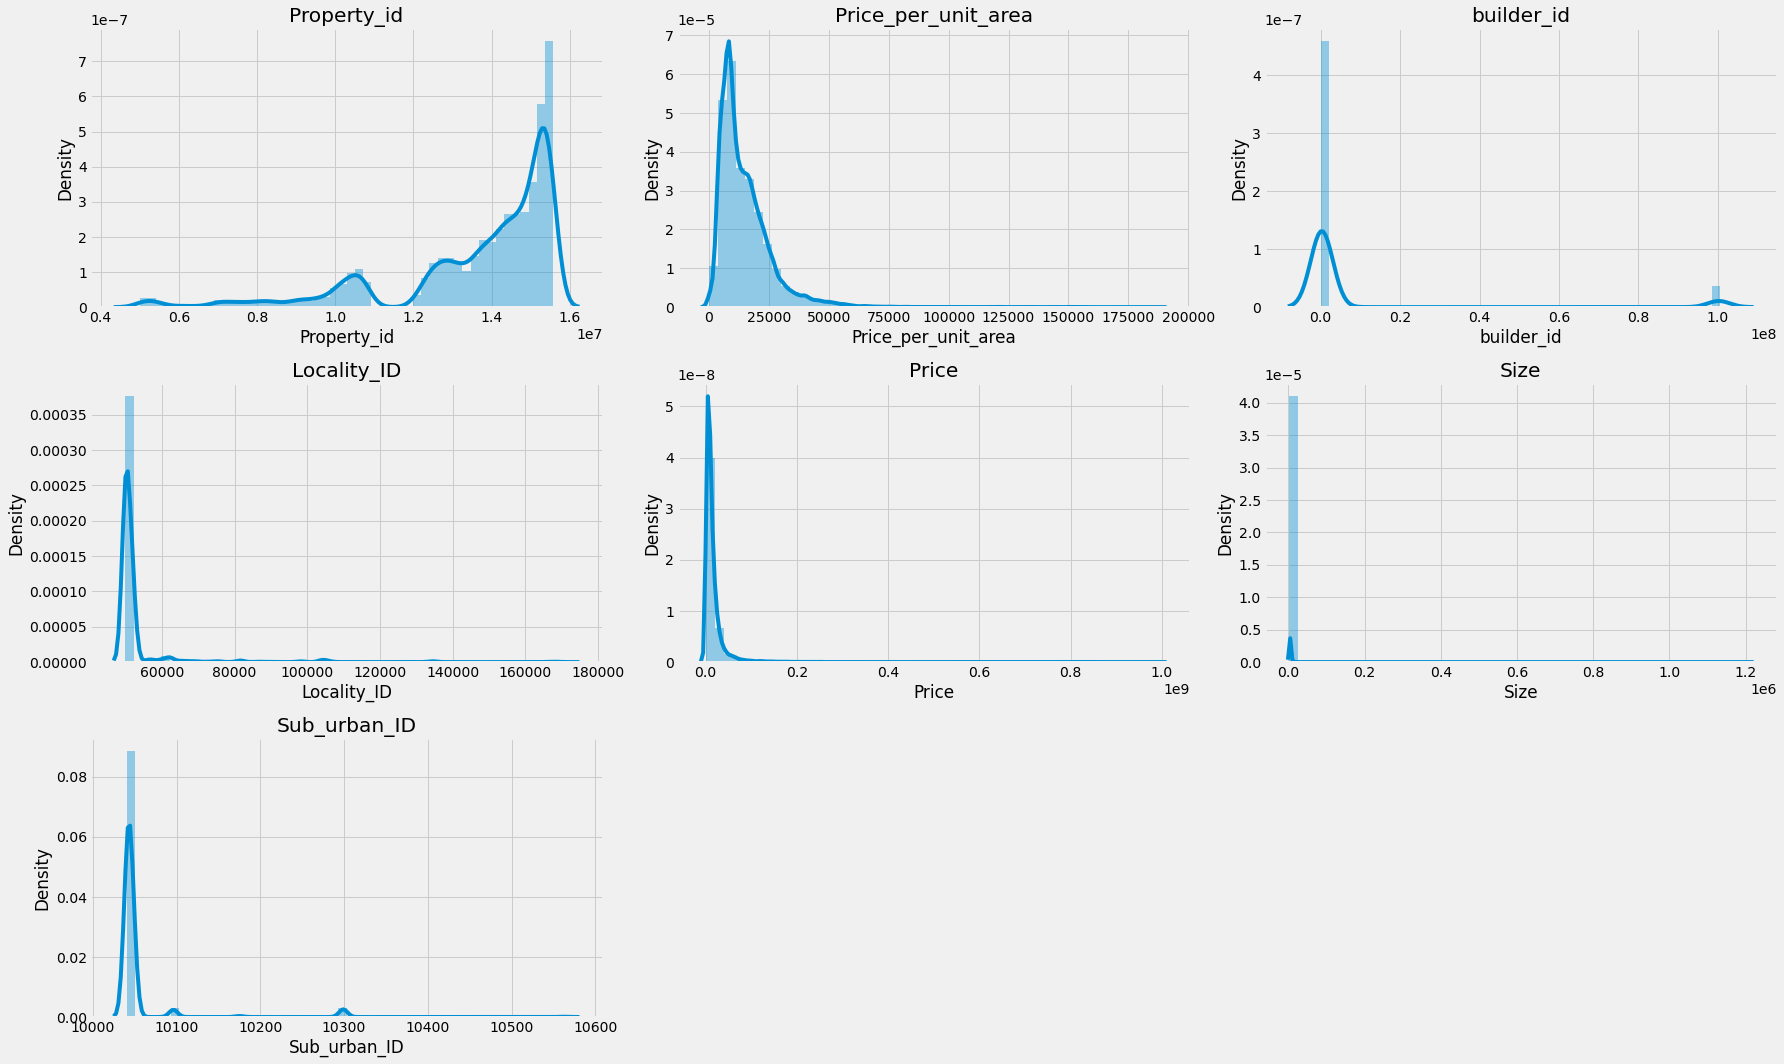

In [17]:
#Dist Plot for Numerical Features
plt.figure(figsize=(25,15))
nr=3
nc=3
it=1
for i in df.select_dtypes(include=np.number).columns:
    plt.subplot(nr,nc,it)
    sns.distplot(df.loc[:,i])
    plt.title(i)
    it+=1
plt.tight_layout()
print(df.select_dtypes(include=np.number).skew())
plt.show()

* From these plots we can infer that Price_per_unit_area, Price, Size are positively skewed and Size is heavily skewed.
Proper Scaling has to be done to reduce the skewness

In [18]:
df.select_dtypes(include='object').columns

Index(['Property_Name', 'Property_type', 'Property_status', 'Builder_name',
       'Property_building_status', 'No_of_BHK', 'Locality_Name',
       'Sub_urban_name', 'is_furnished'],
      dtype='object')

In [19]:
df.select_dtypes(include='bool').columns

Index(['is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move',
       'is_PentaHouse', 'is_studio'],
      dtype='object')

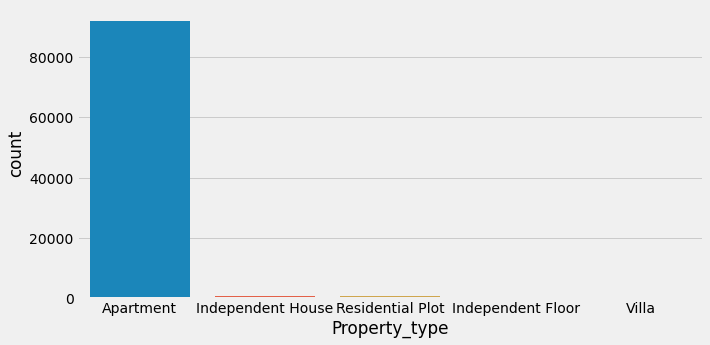

In [20]:
plt.figure(figsize=(10,5))
col = ['Property_type', 'Property_status', 'Builder_name',
       'Property_building_status', 'No_of_BHK', 'Locality_Name',
       'Sub_urban_name', 'is_furnished','is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move',
       'is_PentaHouse', 'is_studio']
sns.countplot(df.loc[:,'Property_type'])
plt.show()

* We can see that majority of the houses are residential and most of them are Apartments

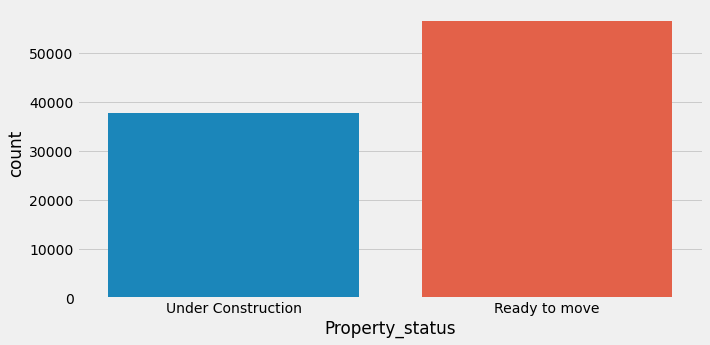

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(df.loc[:,'Property_status'])
plt.show()

* Majority of the houses are ready to move.

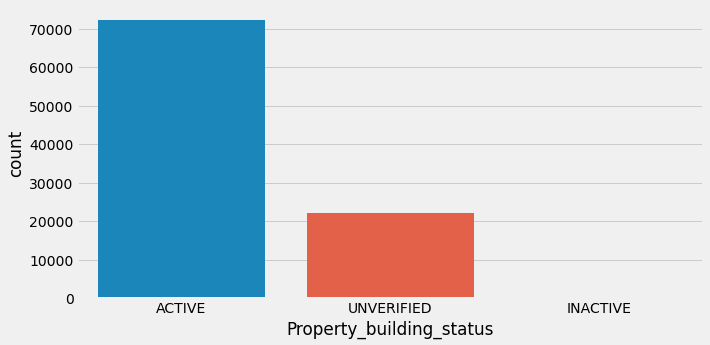

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(df.loc[:,'Property_building_status'])
plt.show()

* Most of the Buildings are active and are verified.

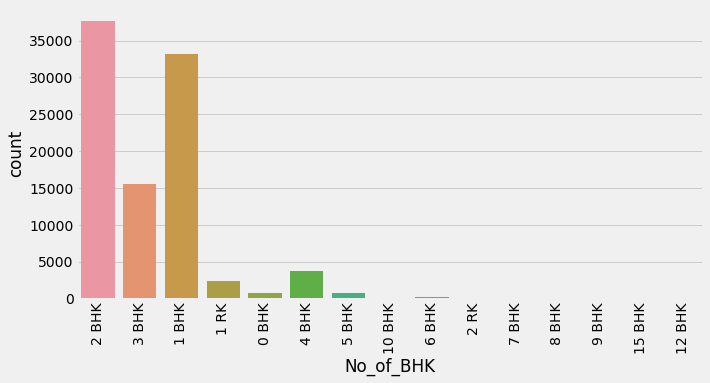

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(df.loc[:,'No_of_BHK'])
plt.xticks(rotation=90)
plt.show()

* Most people in Mumbai prefer 2 BHK houses followed by 1 BHK and 3 BHK houses.

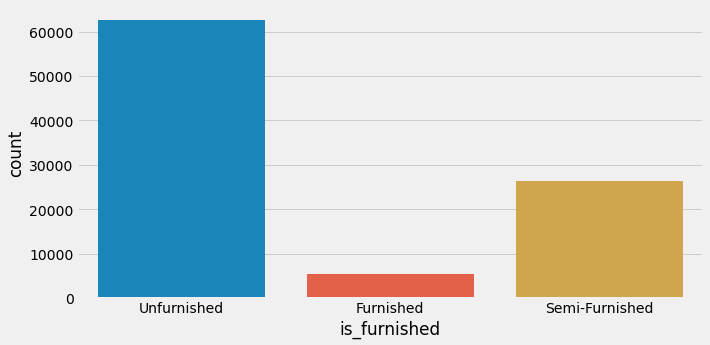

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df.loc[:,'is_furnished'])
plt.show()

* Most of the houses are unfurrnished and some are partially furnished, implying most are newly built houses.

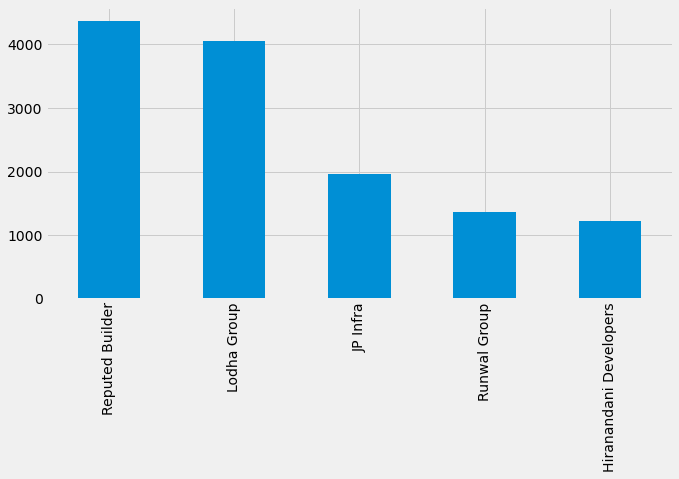

In [25]:
plt.figure(figsize=(10,5))
df.Builder_name.value_counts()[:5].plot(kind='bar')
plt.show()

* Top Builders in Mumbai

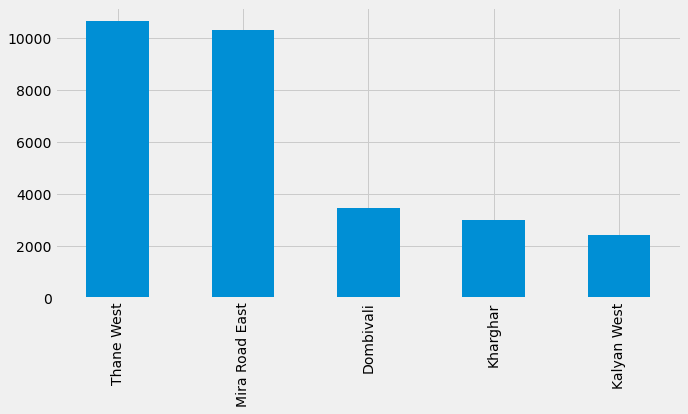

In [26]:
plt.figure(figsize=(10,5))
df.Locality_Name.value_counts()[:5].plot(kind='bar')
plt.show()

* Most Popular Localities in Mumbai for buyers

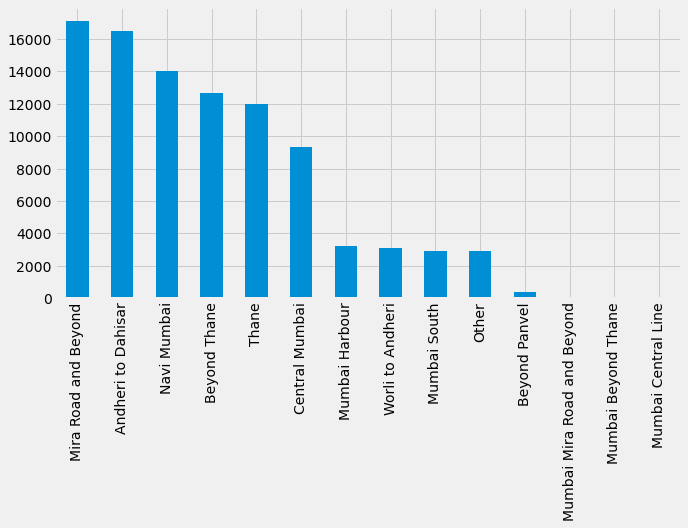

In [27]:
plt.figure(figsize=(10,5))
df.Sub_urban_name.value_counts().plot(kind='bar')
plt.show()

* Ranking of most popular sub urbans in Mumbai

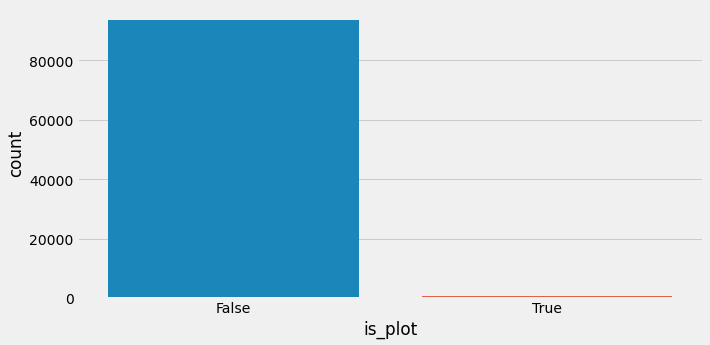

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(df.loc[:,'is_plot'])
plt.show()

* Actually All of them are fully built houses and not plots

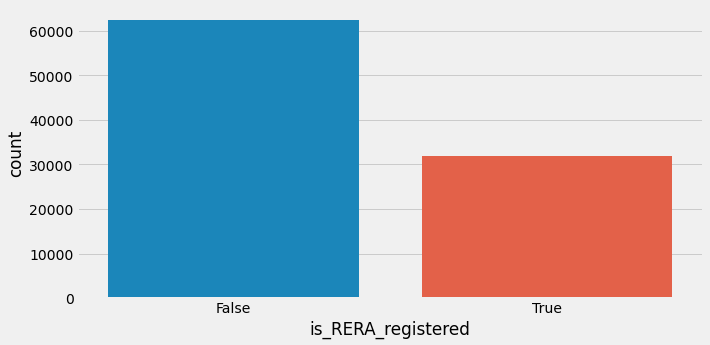

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(df.loc[:,'is_RERA_registered'])
plt.show()

* Majority of the houses are not RERA registered

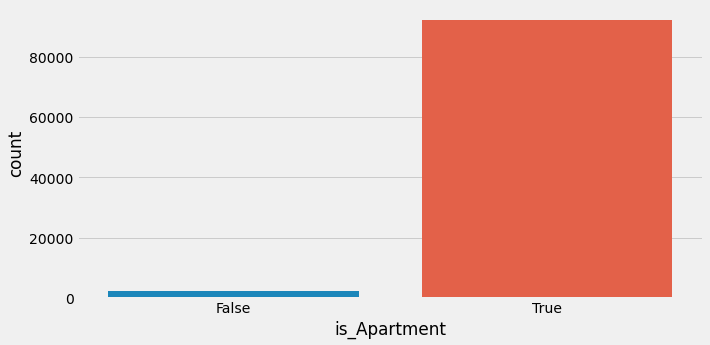

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(df.loc[:,'is_Apartment'])
plt.show()

* Majority of the houses are Apartments

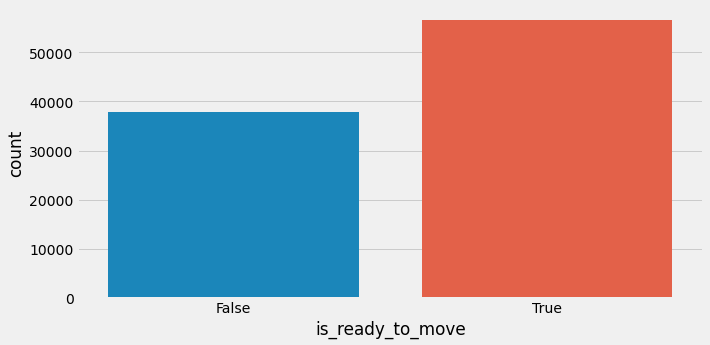

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(df.loc[:,'is_ready_to_move'])
plt.show()

* Majority of the houses are ready to move and completed

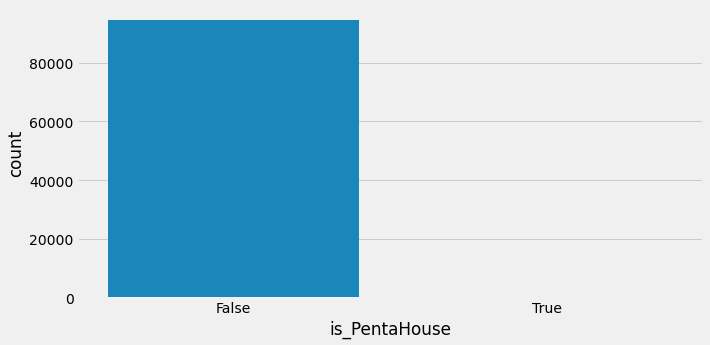

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(df.loc[:,'is_PentaHouse'])
plt.show()

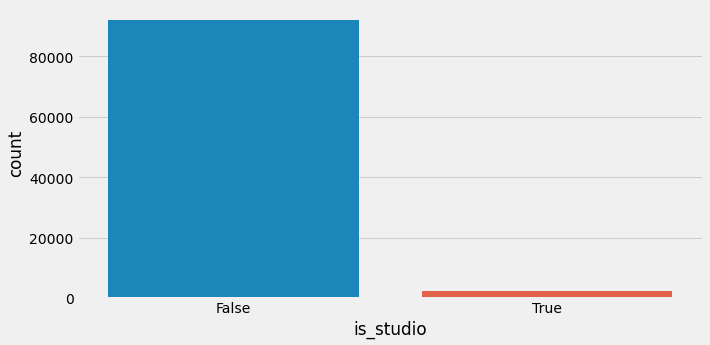

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(df.loc[:,'is_studio'])
plt.show()

* 

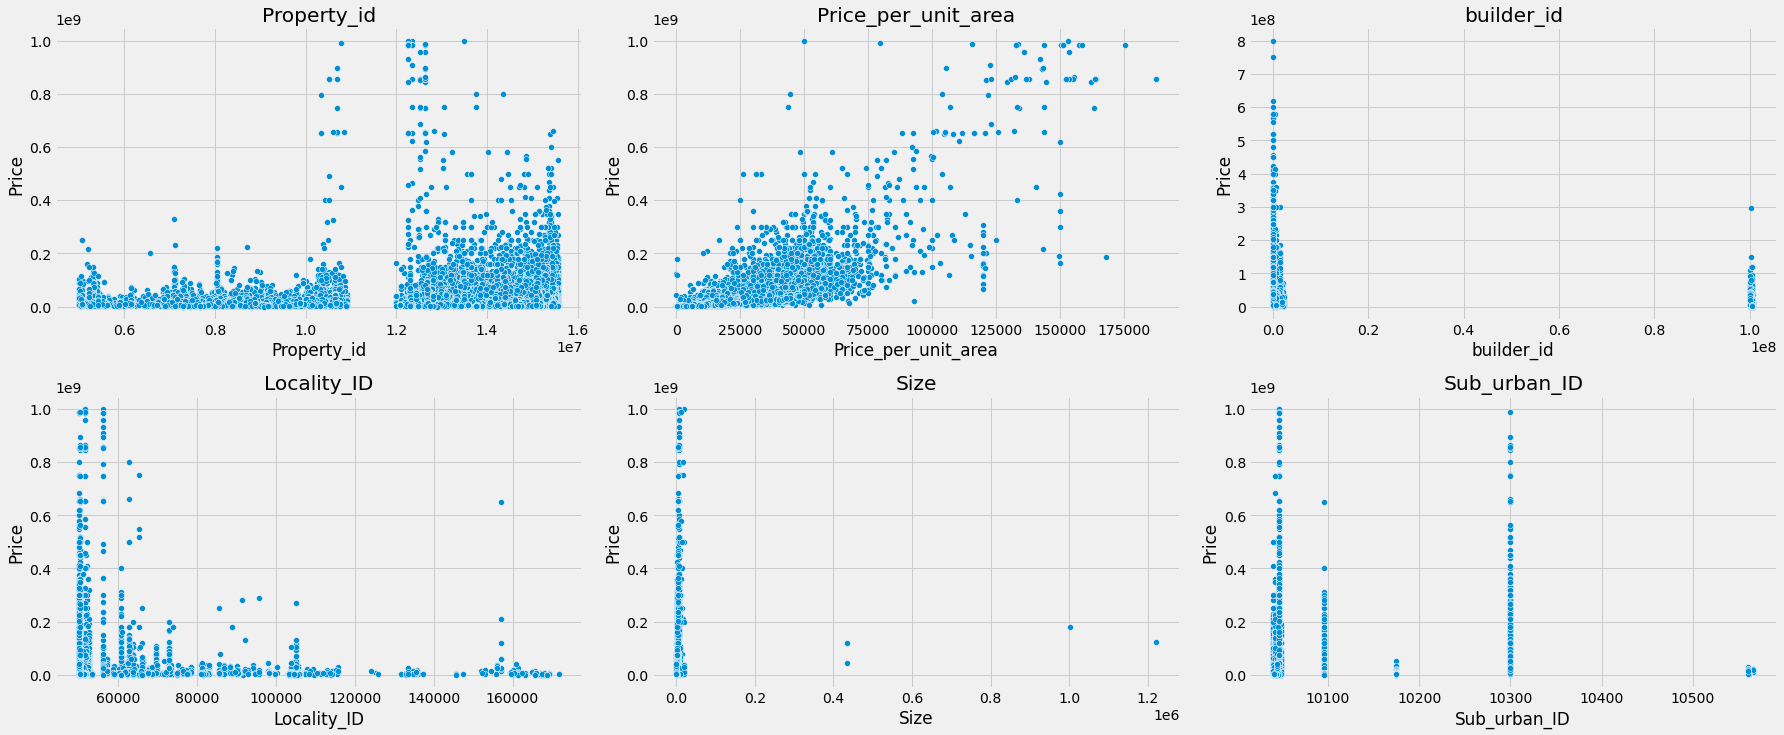

In [34]:
#Bivariate Analysis
plt.figure(figsize=(25,15))
r=3
c=2
it=1
numf = [i for i in df.select_dtypes(include=np.number).columns if i!='Price']
for i in numf:
    plt.subplot(nr,nc,it)
    sns.scatterplot(df.loc[:,i],df['Price'])
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

* Size and Price_per_unit area are correlated with the Target Variable Price

In [35]:
numf

['Property_id',
 'Price_per_unit_area',
 'builder_id',
 'Locality_ID',
 'Size',
 'Sub_urban_ID']

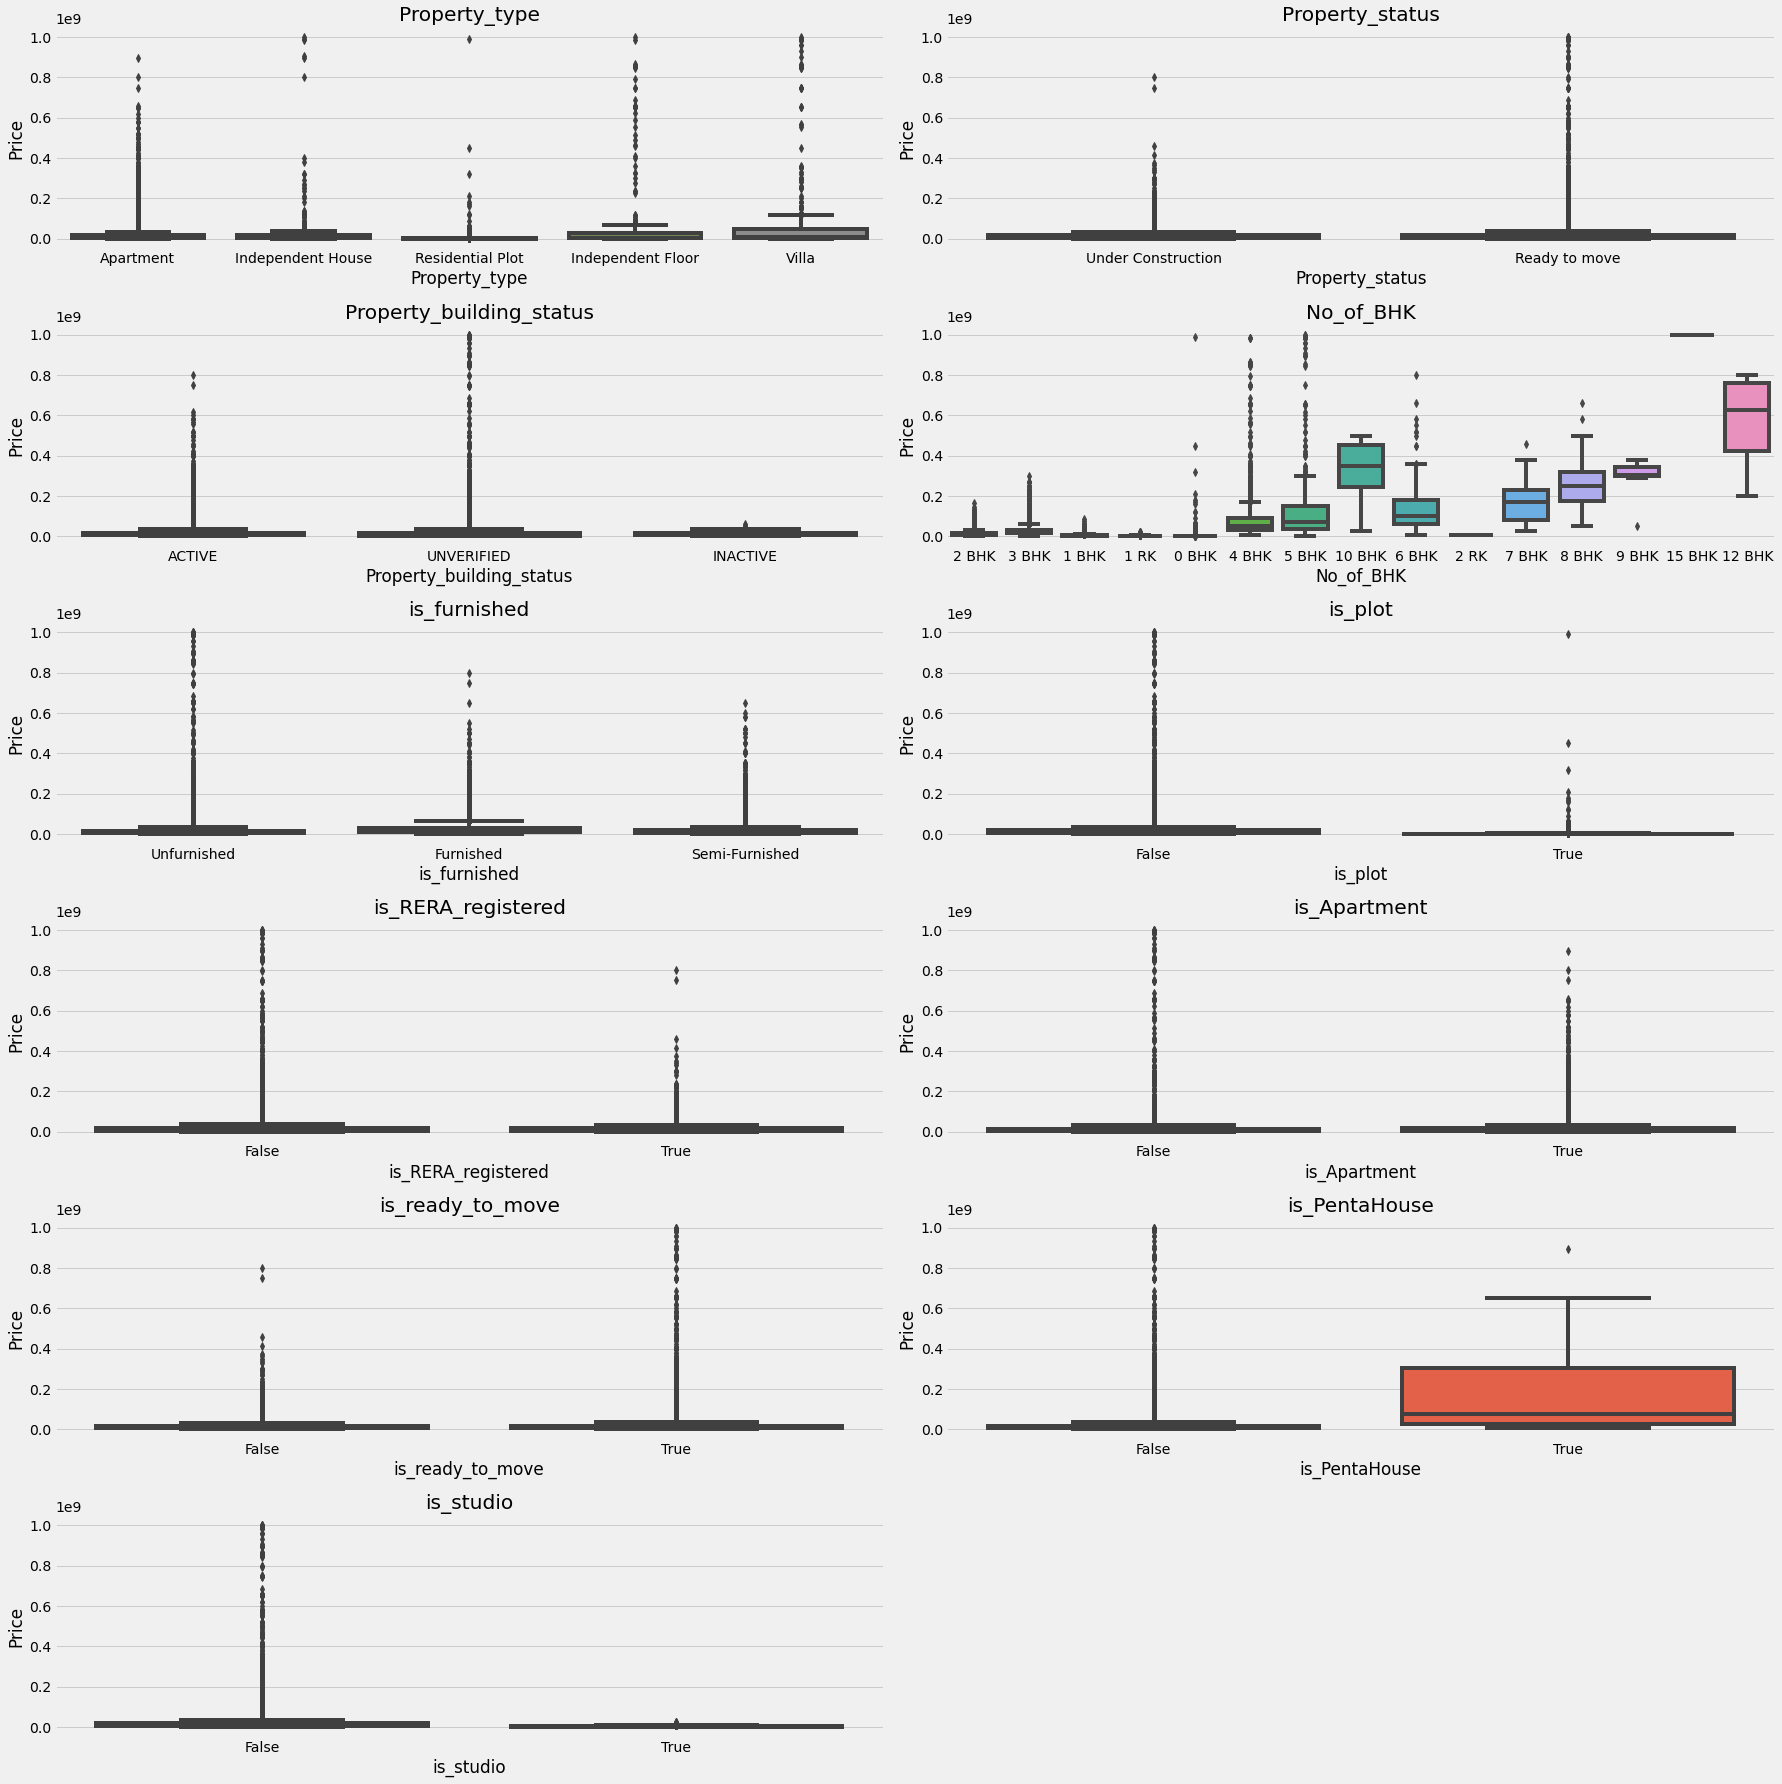

In [36]:
#Cat vs Num 
plt.figure(figsize=(25,25))
col = ['Property_type', 'Property_status', 
       'Property_building_status', 'No_of_BHK', 
        'is_furnished','is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move',
       'is_PentaHouse', 'is_studio']
nr=6
nc=2
it=1
for i in col:
    plt.subplot(nr,nc,it)
    sns.boxplot(df.loc[:,i],df.loc[:,'Price'])
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

**Feature Engineering:**

In [37]:
df.head(1)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio
0,Liberty Bay Vue,15575892,Apartment,Under Construction,21000,678874.0,Liberty Group Mumbai,ACTIVE,2 BHK,50028,Malad West,15498000,738,10042,Andheri to Dahisar,Unfurnished,False,True,True,False,False,False


In [38]:
df.Property_id.nunique(), df.builder_id.nunique(), df.Locality_ID.nunique(), df.Sub_urban_ID.nunique()

(69464, 3686, 671, 14)

In [39]:
df.builder_id.value_counts().head(10).index

Float64Index([   101262.0,    100089.0,    100494.0, 100091292.0,    100059.0,
                 100157.0,    100880.0,    101625.0,    100111.0,    100151.0],
             dtype='float64')

**Binning The top builders in the city as top and not top**

In [40]:
b_10 = [   101262.0,    100089.0,    100494.0, 100091292.0,    100059.0,
                 100157.0,    100880.0,    101625.0,    100111.0,    100151.0]
def top_builder(x):
    if x in b_10:
        return('Top Builder')
    else:
        return('Not a Top Builder')
df['Builder_Rank'] = df.builder_id.apply(top_builder)
df.head(1)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank
0,Liberty Bay Vue,15575892,Apartment,Under Construction,21000,678874.0,Liberty Group Mumbai,ACTIVE,2 BHK,50028,Malad West,15498000,738,10042,Andheri to Dahisar,Unfurnished,False,True,True,False,False,False,Not a Top Builder


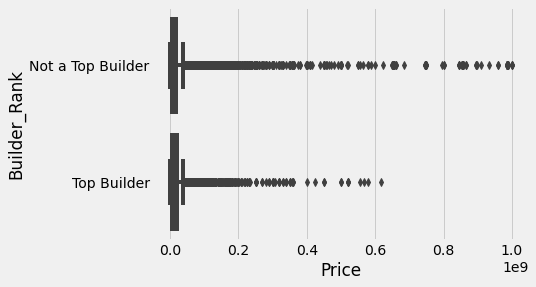

In [41]:
sns.boxplot(y=df.Builder_Rank,x=df.Price)
plt.show()

* Top builders are quite economical compared to non-top ones

In [42]:
df.Locality_ID.value_counts().head(10).index

Int64Index([50063, 51735, 50030, 50003, 50031, 50027, 50019, 50412, 50023,
            50006],
           dtype='int64')

**Binning Top locations in the city as Popular and non Popular**

In [43]:
l=[50063, 51735, 50030, 50003, 50031, 50027, 50019, 50412, 50023,
            50006]
def prime_loc(x):
    if x in l:
        return('Populous Location')
    else:
        return('Non Populous Location')

In [44]:
df['Location_type'] = df.Locality_ID.apply(prime_loc)

In [45]:
df.head(1)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type
0,Liberty Bay Vue,15575892,Apartment,Under Construction,21000,678874.0,Liberty Group Mumbai,ACTIVE,2 BHK,50028,Malad West,15498000,738,10042,Andheri to Dahisar,Unfurnished,False,True,True,False,False,False,Not a Top Builder,Non Populous Location


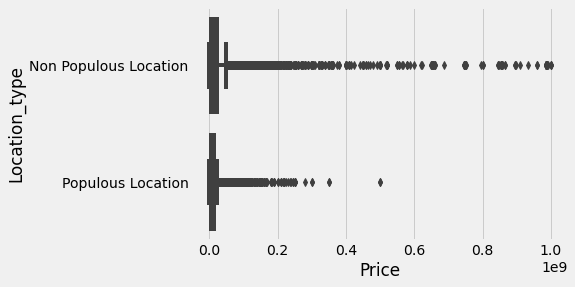

In [46]:
sns.boxplot(y=df.Location_type,x=df.Price)
plt.show()

**Binning Top Sub Urban Regions In Mumbai:**

In [47]:
df.Sub_urban_ID.value_counts().head(5).index

Int64Index([10041, 10042, 10045, 10043, 10048], dtype='int64')

In [48]:
s = [10041, 10042, 10045, 10043, 10048]
def top_sub(z):
    if z in s:
        return('Top Suburban')
    else:
        return('Not a Top Suburban')

In [49]:
df['Suburban_Status'] = df.Sub_urban_ID.apply(top_sub)
df.head(1)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status
0,Liberty Bay Vue,15575892,Apartment,Under Construction,21000,678874.0,Liberty Group Mumbai,ACTIVE,2 BHK,50028,Malad West,15498000,738,10042,Andheri to Dahisar,Unfurnished,False,True,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban


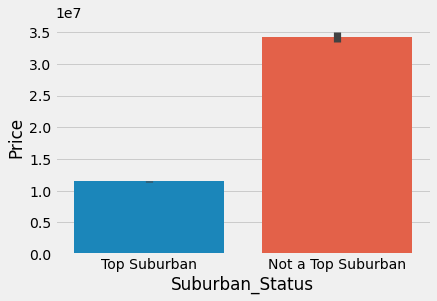

In [50]:
sns.barplot(df.Suburban_Status,df.Price)
plt.show()

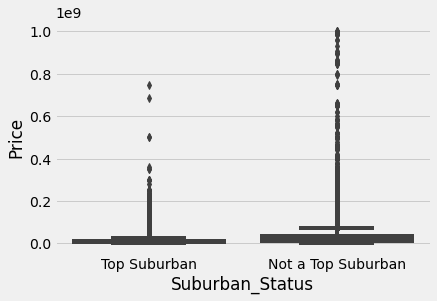

In [51]:
sns.boxplot(df.Suburban_Status,df.Price)
plt.show()

* Clearly Top Suburbans are budget friendly and economical

In [52]:
df.groupby('Sub_urban_name')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Sub_urban_name,,,,,,,,
Andheri to Dahisar,16518.0,2.025941e+07,2.069136e+07,350000.0,10500000.0,16100000.0,24000000.00,746461194.0
Beyond Panvel,397.0,3.758618e+06,3.797148e+06,250000.0,2254999.0,2970000.0,4153000.00,52500000.0
Beyond Thane,12673.0,4.747675e+06,3.626961e+06,300000.0,2807500.0,4185000.0,5800000.00,150000000.0
Central Mumbai,9317.0,2.019529e+07,1.907104e+07,160000.0,10893567.0,16000000.0,23000000.00,500000000.0
Mira Road and Beyond,17138.0,6.452099e+06,3.256266e+06,300000.0,4099000.0,6022500.0,8300000.00,120000000.0
Mumbai Beyond Thane,10.0,3.005000e+06,1.443270e+06,1100000.0,1862500.0,2724999.5,4387500.00,4800000.0
Mumbai Central Line,6.0,1.483683e+07,4.215360e+06,11600000.0,11805250.0,12960500.0,16800000.00,22000000.0
Mumbai Harbour,3216.0,2.639547e+07,1.983027e+07,340000.0,14000000.0,21000000.0,31249999.75,350000000.0
Mumbai Mira Road and Beyond,106.0,1.167166e+07,4.751527e+06,2700000.0,9025000.0,9800000.0,15000000.00,29900000.0


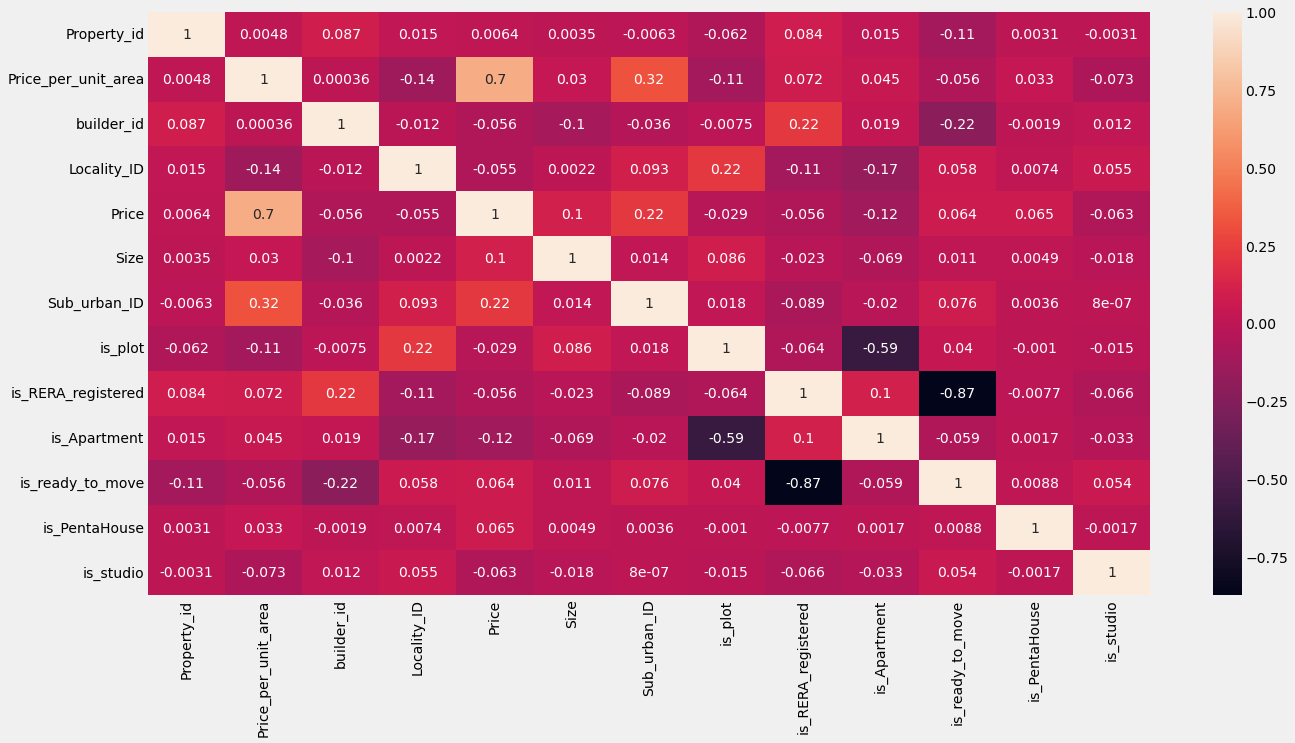

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [54]:
df.head(1)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status
0,Liberty Bay Vue,15575892,Apartment,Under Construction,21000,678874.0,Liberty Group Mumbai,ACTIVE,2 BHK,50028,Malad West,15498000,738,10042,Andheri to Dahisar,Unfurnished,False,True,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban


In [55]:
df.columns

Index(['Property_Name', 'Property_id', 'Property_type', 'Property_status',
       'Price_per_unit_area', 'builder_id', 'Builder_name',
       'Property_building_status', 'No_of_BHK', 'Locality_ID', 'Locality_Name',
       'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'is_furnished',
       'is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move',
       'is_PentaHouse', 'is_studio', 'Builder_Rank', 'Location_type',
       'Suburban_Status'],
      dtype='object')

In [56]:
#Converting Bool to Object 
bool_int = ['is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move',
       'is_PentaHouse', 'is_studio']
for i in bool_int:
    df[i] = df[i].astype('object')
    #df[i] = df[i].map({'True':1.0,'False':0.0})

In [57]:
df.head(1)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status
0,Liberty Bay Vue,15575892,Apartment,Under Construction,21000,678874.0,Liberty Group Mumbai,ACTIVE,2 BHK,50028,Malad West,15498000,738,10042,Andheri to Dahisar,Unfurnished,False,True,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban


In [58]:
l = [df.select_dtypes(include=np.number).columns]
l

[Index(['Property_id', 'Price_per_unit_area', 'builder_id', 'Locality_ID',
        'Price', 'Size', 'Sub_urban_ID'],
       dtype='object')]

**Statistical Tests for Feature Importance**

* Ho : The features are not significant.

* Ha : The features are significant.

In [59]:
print(stats.ttest_ind(df.Property_id,df.Price))
print(stats.ttest_ind(df.Price_per_unit_area,df.Price))
print(stats.ttest_ind(df.builder_id,df.Price))
print(stats.ttest_ind(df.Size,df.Price))
print(stats.ttest_ind(df.Sub_urban_ID,df.Price))


Ttest_indResult(statistic=-28.274010841896132, pvalue=1.6821596525118956e-175)
Ttest_indResult(statistic=-150.73620168272015, pvalue=0.0)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=-150.86019034363656, pvalue=0.0)
Ttest_indResult(statistic=-150.77888561387684, pvalue=0.0)


**Binning each suburban area with the median price of that respective sub urban area to improve correlation**

In [60]:
df['Median_Price_per_Sub_Urb'] = df.groupby('Sub_urban_name')['Price'].transform('median')
df.head(1)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status,Median_Price_per_Sub_Urb
0,Liberty Bay Vue,15575892,Apartment,Under Construction,21000,678874.0,Liberty Group Mumbai,ACTIVE,2 BHK,50028,Malad West,15498000,738,10042,Andheri to Dahisar,Unfurnished,False,True,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban,16100000.0


In [61]:
df['Median_price_per_loc'] = df.groupby('Locality_Name')['Price'].transform('median')

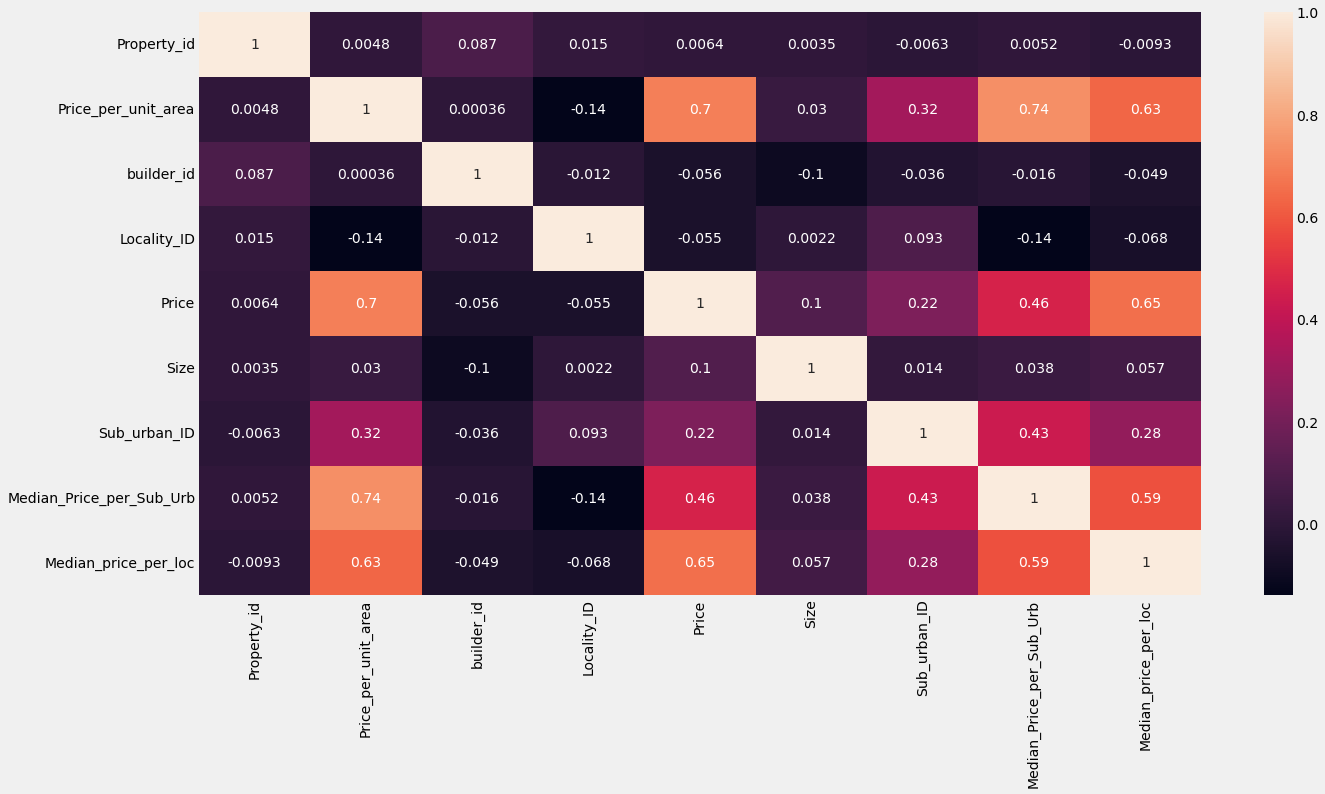

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [63]:
df.No_of_BHK.value_counts()

2 BHK     37689
1 BHK     33182
3 BHK     15569
4 BHK      3743
1 RK       2354
0 BHK       815
5 BHK       692
6 BHK       193
7 BHK        35
8 BHK        33
10 BHK       19
9 BHK         8
12 BHK        4
2 RK          2
15 BHK        1
Name: No_of_BHK, dtype: int64

**We can consider 1 Rk as 0 BHK as RK is basically a bedroom hall combined + a kitchen. Similarly 2 RK is basically 2 BHK**

**We can Bin the houses based on the number of rooms:**

* 0BHK, 1RK, 1 BHK - Small House
* 2RK, 2BHK, 3BHK - Regular House
* 4BHK, 5BHK, 6BHK - Large House
* Rest - Ultra Large

In [64]:
def size_conv(x):
    if x == '0 BHK' or x == '1 RK' or x == '1 BHK':
        return('Small')
    elif x == '2 RK ' or x == '2 BHK' or x == '3 BHK':
        return('Regular')
    elif x == '4 BHK' or x == '5 BHK' or x == '6 BHK':
        return('Large')
    else:
        return('Ultra')
df['BHK_Class'] = df['No_of_BHK'].apply(size_conv)
df.head(1)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status,Median_Price_per_Sub_Urb,Median_price_per_loc,BHK_Class
0,Liberty Bay Vue,15575892,Apartment,Under Construction,21000,678874.0,Liberty Group Mumbai,ACTIVE,2 BHK,50028,Malad West,15498000,738,10042,Andheri to Dahisar,Unfurnished,False,True,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban,16100000.0,15500000.0,Regular


In [65]:
df.BHK_Class.value_counts()

Regular    53258
Small      36351
Large       4628
Ultra        102
Name: BHK_Class, dtype: int64

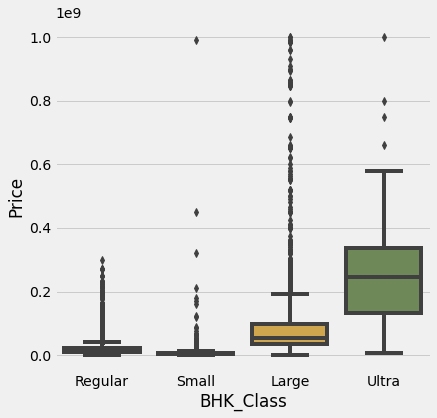

In [66]:
plt.figure(figsize=((6,6)))
sns.boxplot(df.BHK_Class,df.Price)
plt.show()

* small > Regular > Large > Ultra - Price Range of Houses based on BHK in Mumbai

**Dividing Mumbai City into North, SOuth, East, West and Central for better price distribution.**

In [67]:
d1={'Mira Road and Beyond':'North','Andheri to Dahisar':'North','Navi Mumbai':'East',
    'Beyond Thane':'North','Thane':'North','Central Mumbai':'Central','Mumbai Harbour':'South',
    'Worli to Andheri':'East','Mumbai South':'South','Other':'West','Beyond Panvel':'East',
    'Mumbai Mira Road and Beyond':'North','Mumbai Beyond Thane':'North',
    'Mumbai Central Line':'Central'}


def suburb_dir(k):
        if k=='Mira Road and Beyond' or k=='Andheri to Dahisar' or k=='Beyond Thane' or k=='Thane' or k == 'Mumbai Mira Road and Beyond' or k=='Mumbai Beyond Thane':
            return('North')
        elif k=='Navi Mumbai' or k=='Worli to Andheri' or k == 'Beyond Panvel':
            return('East')
        elif k == 'Central Mumbai' or k=='Mumbai Central Line':
            return('Central')
        elif k=='Mumbai Harbour' or k=='Mumbai South':
            return('South')
        else:
            return('West')

df['Sub_urb_Region'] = df['Sub_urban_name'].apply(suburb_dir)

In [68]:
df.head(1)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status,Median_Price_per_Sub_Urb,Median_price_per_loc,BHK_Class,Sub_urb_Region
0,Liberty Bay Vue,15575892,Apartment,Under Construction,21000,678874.0,Liberty Group Mumbai,ACTIVE,2 BHK,50028,Malad West,15498000,738,10042,Andheri to Dahisar,Unfurnished,False,True,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban,16100000.0,15500000.0,Regular,North


In [69]:
df.Sub_urb_Region.value_counts()

North      58436
East       17504
Central     9323
South       6158
West        2918
Name: Sub_urb_Region, dtype: int64

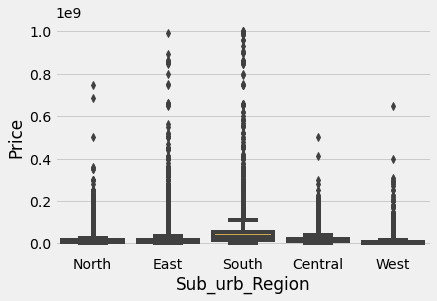

In [70]:
sns.boxplot(df.Sub_urb_Region,df.Price)
plt.show()

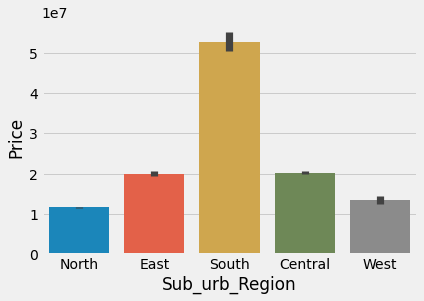

In [71]:
sns.barplot(df.Sub_urb_Region,df.Price)
plt.show()

* South Mumbai is highly expensive , North Mumbai being economical, East and Central being second Highest with west being moderately expensive

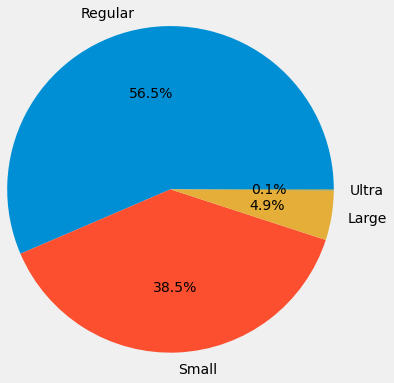

In [72]:
#BHK Class Representation
plt.pie(df.BHK_Class.value_counts(),labels = df.BHK_Class.value_counts().index, autopct='%.1f%%',radius=1.75)
plt.show()

In [73]:
df.Property_type.value_counts()

Apartment            92033
Residential Plot       815
Independent House      607
Villa                  509
Independent Floor      375
Name: Property_type, dtype: int64

**Since we predict only residential Properties, we drop properties that are plots and of commercial Usage**

In [74]:
res = df.loc[df['Property_type']=='Residential Plot'].index
df = df.drop(res,axis=0)
df.head(1)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status,Median_Price_per_Sub_Urb,Median_price_per_loc,BHK_Class,Sub_urb_Region
0,Liberty Bay Vue,15575892,Apartment,Under Construction,21000,678874.0,Liberty Group Mumbai,ACTIVE,2 BHK,50028,Malad West,15498000,738,10042,Andheri to Dahisar,Unfurnished,False,True,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban,16100000.0,15500000.0,Regular,North


In [75]:
inf = df.loc[df['Property_type']=='Independent Floor'].index
df = df.drop(inf,axis=0)

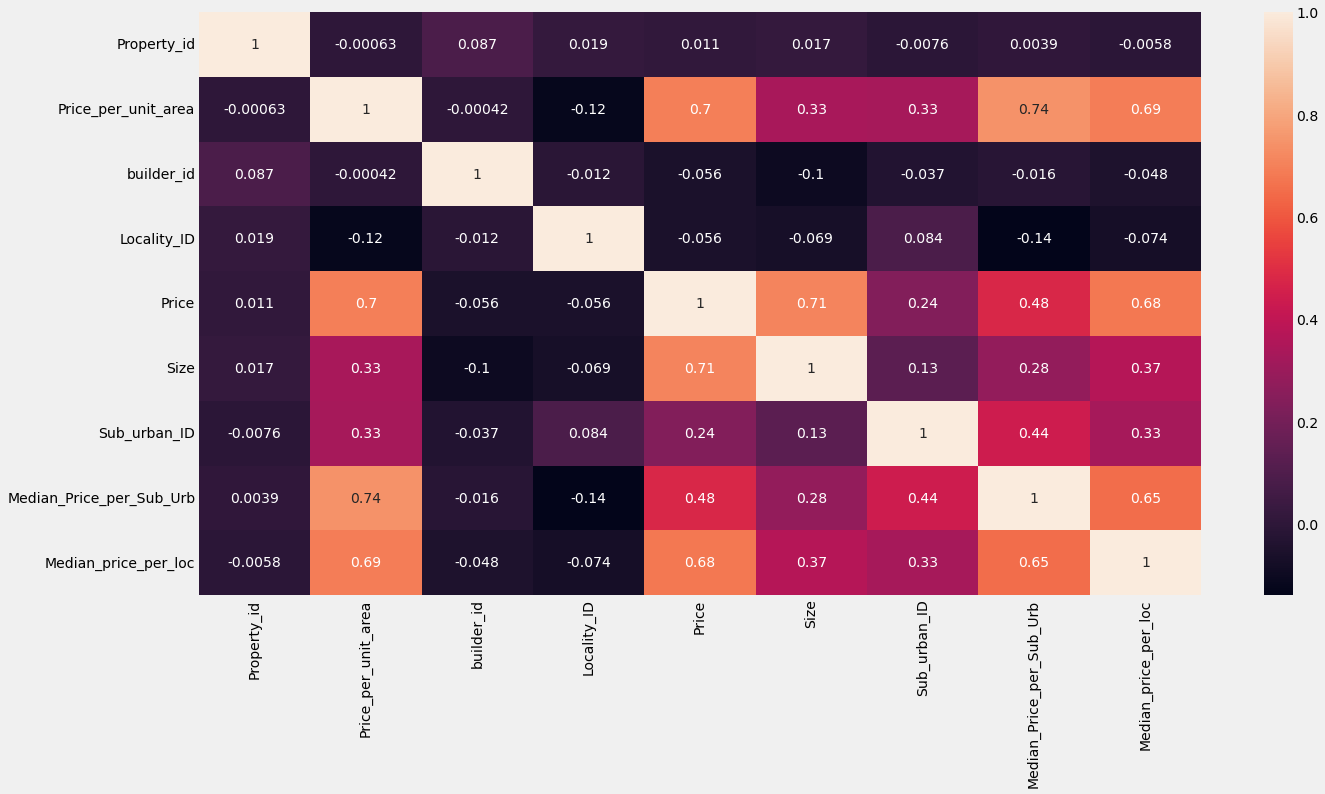

In [76]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

**NULL VALUES TREATMENT:**

In [77]:
df.isnull().sum()[df.isnull().sum()!=0]

Property_Name           18640
builder_id              21228
Builder_name            21228
Locality_Name               2
Median_price_per_loc        2
dtype: int64

In [78]:
df[df.Locality_Name.isnull()]

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status,Median_Price_per_Sub_Urb,Median_price_per_loc,BHK_Class,Sub_urb_Region
69333,Godavari,15313602,Apartment,Ready to move,4200,756840.0,Arvind Shelters,ACTIVE,3 BHK,106544,NaN,6039600,1438,10096,Other,Semi-Furnished,False,False,True,True,False,False,Not a Top Builder,Non Populous Location,Not a Top Suburban,4799000.0,NaN,Regular,West
71204,Godavari,15531746,Apartment,Ready to move,4200,756840.0,Arvind Shelters,ACTIVE,3 BHK,106544,NaN,6984600,1663,10096,Other,Semi-Furnished,False,False,True,True,False,False,Not a Top Builder,Non Populous Location,Not a Top Suburban,4799000.0,NaN,Regular,West


In [79]:
#Imputing Null Locality values with mode and median
df['Locality_Name'] = df['Locality_Name'].fillna(df['Locality_Name'].mode()[0])
c = ['Median_price_per_loc']
for i in c:
    df[c] = df[c].fillna(df[c].median())

In [80]:
df[df['Property_Name'].isnull()].head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status,Median_Price_per_Sub_Urb,Median_price_per_loc,BHK_Class,Sub_urb_Region
73,NaN,9153139,Apartment,Under Construction,4206,NaN,NaN,UNVERIFIED,1 BHK,51729,Badlapur East,2650000,630,10043,Beyond Thane,Unfurnished,False,False,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban,4185000.0,2800000.0,Small,North
304,NaN,15575336,Apartment,Ready to move,4126,NaN,NaN,UNVERIFIED,1 BHK,50006,Panvel,2600000,630,10045,Navi Mumbai,Unfurnished,False,False,True,True,False,False,Not a Top Builder,Populous Location,Top Suburban,8500000.0,7000000.0,Small,East
307,NaN,14706213,Apartment,Ready to move,4130,NaN,NaN,UNVERIFIED,1 BHK,51576,Neral,1900000,460,10043,Beyond Thane,Unfurnished,False,False,True,True,False,False,Not a Top Builder,Non Populous Location,Top Suburban,4185000.0,2125000.0,Small,North
308,NaN,7995333,Apartment,Ready to move,3538,NaN,NaN,UNVERIFIED,1 BHK,51729,Badlapur East,2300000,650,10043,Beyond Thane,Semi-Furnished,False,False,True,True,False,False,Not a Top Builder,Non Populous Location,Top Suburban,4185000.0,2800000.0,Small,North
310,NaN,15579267,Apartment,Ready to move,5129,NaN,NaN,UNVERIFIED,1 RK,51250,Bhiwandi,1590000,310,10043,Beyond Thane,Semi-Furnished,False,False,True,True,False,True,Not a Top Builder,Non Populous Location,Top Suburban,4185000.0,3400000.0,Small,North


***Imputing null Property and Building names with the most popular Building and Property in that Sub urban Area***

In [81]:
df.Sub_urban_name.unique()

array(['Andheri to Dahisar', 'Thane', 'Beyond Thane', 'Navi Mumbai',
       'Mira Road and Beyond', 'Mumbai Harbour', 'Central Mumbai',
       'Beyond Panvel', 'Worli to Andheri', 'Mumbai South', 'Other',
       'Mumbai Mira Road and Beyond', 'Mumbai Central Line',
       'Mumbai Beyond Thane'], dtype=object)

In [82]:
d={}
sub_urban_names = ['Andheri to Dahisar', 'Beyond Panvel', 'Beyond Thane', 'Central Mumbai',
       'Mira Road and Beyond', 'Mumbai Beyond Thane', 'Mumbai Central Line',
       'Mumbai Harbour', 'Mumbai Mira Road and Beyond', 'Mumbai South',
       'Navi Mumbai', 'Other', 'Thane', 'Worli to Andheri']
pop = []
for i in sub_urban_names:
    d[i] = [j for j in (df[df['Sub_urban_name']==i]['Property_Name'].mode().values)]
d['Mumbai Central Line'] = ['JP North Barcelona']
d['Thane'] = ['Sheth Avalon']

In [83]:
d = {k: str(v[0]) for k,v in d.items()}
d

{'Andheri to Dahisar': 'Romell Amore',
 'Beyond Panvel': 'Indiabulls Indiabulls Golf City',
 'Beyond Thane': 'Runwal Gardens',
 'Central Mumbai': 'Runwal Bliss',
 'Mira Road and Beyond': 'JP North Barcelona',
 'Mumbai Beyond Thane': 'Vivena homes Neral',
 'Mumbai Central Line': 'JP North Barcelona',
 'Mumbai Harbour': 'Bombay ICC',
 'Mumbai Mira Road and Beyond': 'On request',
 'Mumbai South': 'Lodha Vista',
 'Navi Mumbai': 'Paradise Sai World Empire',
 'Other': 'bOLINJ nAKA',
 'Thane': 'Sheth Avalon',
 'Worli to Andheri': 'Radius Ten BKC'}

In [84]:
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Andheri to Dahisar'),'Property_Name'] = 'Romell Amore'
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Beyond Panvel'),'Property_Name'] = 'Indiabulls Indiabulls Golf City'
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Beyond Thane'),'Property_Name'] = 'Runwal Gardens'
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Central Mumbai'),'Property_Name'] = 'Runwal Bliss'
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Mira Road and Beyond'),'Property_Name'] = 'JP North Barcelona'
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Mumbai Beyond Thane'),'Property_Name'] = 'Vivena homes Neral'
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Mumbai Central Line'),'Property_Name'] = 'JP North Barcelona'
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Mumbai Harbour'),'Property_Name'] = 'Bombay ICC'
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Mumbai Mira Road and Beyond'),'Property_Name'] = 'On request'
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Mumbai South'),'Property_Name'] = 'Lodha Vista'
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Navi Mumbai'),'Property_Name'] = 'Paradise Sai World Empire'
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Other'),'Property_Name'] = 'bOLINJ nAKA'
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Thane'),'Property_Name'] = 'Sheth Avalon'
df.loc[(df['Property_Name'].isnull()) & (df['Sub_urban_name']=='Worli to Andheri'),'Property_Name'] = 'Radius Ten BKC'

In [85]:
sub_urban_names = ['Andheri to Dahisar', 'Beyond Panvel', 'Beyond Thane', 'Central Mumbai',
       'Mira Road and Beyond', 'Mumbai Beyond Thane', 'Mumbai Central Line',
       'Mumbai Harbour', 'Mumbai Mira Road and Beyond', 'Mumbai South',
       'Navi Mumbai', 'Other', 'Thane', 'Worli to Andheri']
d_b = {}
for i in sub_urban_names:
    d_b[i] = [j for j in (df[df['Sub_urban_name']==i]['Builder_name'].mode().values)]
    
d_b['Mumbai Beyond Thane'] = ['Unknown']
d_b['Mumbai Central Line'] = ['Unknown']

In [86]:
d_b = {y: str(z[0]) for y,z in d_b.items()}
d_b

{'Andheri to Dahisar': 'Reputed Builder',
 'Beyond Panvel': 'Indiabulls Infraestate',
 'Beyond Thane': 'Lodha Group',
 'Central Mumbai': 'Runwal Group',
 'Mira Road and Beyond': 'JP Infra',
 'Mumbai Beyond Thane': 'Unknown',
 'Mumbai Central Line': 'Unknown',
 'Mumbai Harbour': 'Lodha Group',
 'Mumbai Mira Road and Beyond': 'Reputed Builder',
 'Mumbai South': 'Lodha Group',
 'Navi Mumbai': 'Paradise Group',
 'Other': 'Reputed Builder',
 'Thane': 'Lodha Group',
 'Worli to Andheri': 'Reputed Builder'}

In [87]:
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Andheri to Dahisar'),'Builder_name'] = 'Reputed Builder'
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Beyond Panvel'),'Builder_name'] = 'Indiabulls Infraestate'
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Beyond Thane'),'Builder_name'] = 'Lodha Group'
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Central Mumbai'),'Builder_name'] = 'Runwal Group'
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Mira Road and Beyond'),'Builder_name'] = 'JP Infra'
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Mumbai Beyond Thane'),'Builder_name'] = 'Unknown'
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Mumbai Central Line'),'Builder_name'] = 'Unknown'
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Mumbai Harbour'),'Builder_name'] = 'Lodha Group'
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Mumbai Mira Road and Beyond'),'Builder_name'] = 'Reputed Builder'
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Mumbai South'),'Builder_name'] = 'Lodha Group'
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Navi Mumbai'),'Builder_name'] = 'Paradise Group'
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Other'),'Builder_name'] = 'Reputed Builder'
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Thane'),'Builder_name'] = 'Lodha Group'
df.loc[(df['Builder_name'].isnull()) & (df['Sub_urban_name']=='Worli to Andheri'),'Builder_name'] = 'Reputed Builder'

In [88]:
sub_urban_names = ['Andheri to Dahisar', 'Beyond Panvel', 'Beyond Thane', 'Central Mumbai',
       'Mira Road and Beyond', 'Mumbai Beyond Thane', 'Mumbai Central Line',
       'Mumbai Harbour', 'Mumbai Mira Road and Beyond', 'Mumbai South',
       'Navi Mumbai', 'Other', 'Thane', 'Worli to Andheri']
d_bid = {}
for i in sub_urban_names:
    d_bid[i] = ((df[df['Sub_urban_name']==i]['builder_id'].mode().values).astype('int'))
    
d_bid['Mumbai Beyond Thane'] = int(df.builder_id.mode().values)
d_bid['Mumbai Central Line'] = int(df.builder_id.mode().values)

In [89]:
d_bid = {i:int(j) for i,j in d_bid.items()}
d_bid

{'Andheri to Dahisar': 101262,
 'Beyond Panvel': 100022,
 'Beyond Thane': 100089,
 'Central Mumbai': 100091292,
 'Mira Road and Beyond': 100494,
 'Mumbai Beyond Thane': 101262,
 'Mumbai Central Line': 101262,
 'Mumbai Harbour': 100089,
 'Mumbai Mira Road and Beyond': 101262,
 'Mumbai South': 100089,
 'Navi Mumbai': 100880,
 'Other': 101262,
 'Thane': 100089,
 'Worli to Andheri': 101262}

In [90]:
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Andheri to Dahisar'),'builder_id'] = 101262
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Beyond Panvel'),'builder_id'] = 100022
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Beyond Thane'),'builder_id']  = 100089
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Central Mumbai'),'builder_id']  = 100091292
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Mira Road and Beyond'),'builder_id']  = 100494
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Mumbai Beyond Thane'),'builder_id']  = 101262
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Mumbai Central Line'),'builder_id']  = 101262
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Mumbai Harbour'),'builder_id']  = 100089
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Mumbai Mira Road and Beyond'),'builder_id'] = 101262
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Mumbai South'),'builder_id']  = 100089
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Navi Mumbai'),'builder_id']  = 100880
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Other'),'builder_id']  = 101262
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Thane'),'builder_id']  = 100089
df.loc[(df['builder_id'].isnull()) & (df['Sub_urban_name']=='Worli to Andheri'),'builder_id'] = 101262

In [91]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [92]:
df.head(1)

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,No_of_BHK,Locality_ID,Locality_Name,Price,Size,Sub_urban_ID,Sub_urban_name,is_furnished,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status,Median_Price_per_Sub_Urb,Median_price_per_loc,BHK_Class,Sub_urb_Region
0,Liberty Bay Vue,15575892,Apartment,Under Construction,21000,678874.0,Liberty Group Mumbai,ACTIVE,2 BHK,50028,Malad West,15498000,738,10042,Andheri to Dahisar,Unfurnished,False,True,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban,16100000.0,15500000.0,Regular,North


In [93]:
df.Property_status.value_counts()

Ready to move         55518
Under Construction    37631
Name: Property_status, dtype: int64

In [94]:
df = df.drop(['Property_status','is_Apartment','builder_id','Property_id','Locality_ID','Sub_urban_ID','is_plot',
              'Price_per_unit_area'],axis=1)

* Property status and is_ready_to_move are both the same columns hence we retain the latter and drop the first one
* is_apartment and Property_type are similarly the same columns.
* We drop Locality, Property, Builder, Suburban IDS as they are unique identifiers and create noise in the data.
* All the houses are residential ones and not plots. Hence is_plot does not carry any significance. 
* Price_per_unit_area is redundant as price and area both are already present and hence it is dropped to avoid multicollinearity issues.

In [95]:
df.head(1)

,Property_Name,Property_type,Builder_name,Property_building_status,No_of_BHK,Locality_Name,Price,Size,Sub_urban_name,is_furnished,is_RERA_registered,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status,Median_Price_per_Sub_Urb,Median_price_per_loc,BHK_Class,Sub_urb_Region
0,Liberty Bay Vue,Apartment,Liberty Group Mumbai,ACTIVE,2 BHK,Malad West,15498000,738,Andheri to Dahisar,Unfurnished,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban,16100000.0,15500000.0,Regular,North


**Binning Each Builder with the median price of that respective builder for wider comparison.**

In [96]:
df['Median_price_per_builder'] = df.groupby('Builder_name')['Price'].transform('median')

**Scaling and Encoding:**

In [97]:
df.select_dtypes(include=np.number).columns

Index(['Price', 'Size', 'Median_Price_per_Sub_Urb', 'Median_price_per_loc',
       'Median_price_per_builder'],
      dtype='object')

In [98]:
sc = StandardScaler()
num_scaled_to_be = ['Price', 'Size', 'Median_Price_per_Sub_Urb',
       'Median_price_per_loc', 'Median_price_per_builder']
for i in num_scaled_to_be:
    df.loc[:,i] = sc.fit_transform(pd.DataFrame(df.loc[:,i]))

In [99]:
df.Property_Name.value_counts()

Paradise Sai World Empire              3885
Romell Amore                           3116
Runwal Gardens                         2870
Sheth Avalon                           2287
bOLINJ nAKA                            2115
                                       ... 
Ajmera Midtown                            1
Reputed Builder Ashish CHS                1
Shanti Star Shanti Vidya Nagri            1
Reputed Builder Nandadeep Apartment       1
Amarnath soc                              1
Name: Property_Name, Length: 11777, dtype: int64

In [100]:
df.head()

,Property_Name,Property_type,Builder_name,Property_building_status,No_of_BHK,Locality_Name,Price,Size,Sub_urban_name,is_furnished,is_RERA_registered,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status,Median_Price_per_Sub_Urb,Median_price_per_loc,BHK_Class,Sub_urb_Region,Median_price_per_builder
0,Liberty Bay Vue,Apartment,Liberty Group Mumbai,ACTIVE,2 BHK,Malad West,-0.035913,-0.343641,Andheri to Dahisar,Unfurnished,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban,0.368832,0.103848,Regular,North,0.296356
1,Shree Krupa Nandanvan Homes Building B,Apartment,Shree Krupa Builders,ACTIVE,3 BHK,Thane West,0.065989,-0.112615,Thane,Unfurnished,True,False,False,False,Not a Top Builder,Populous Location,Top Suburban,-0.152649,-0.117502,Regular,North,0.041456
2,Dev Drashti Empire Phase 1,Apartment,Dev Drashti Group,ACTIVE,2 BHK,Bhiwandi,-0.350401,0.186633,Beyond Thane,Unfurnished,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban,-0.849492,-0.580111,Regular,North,-0.666529
3,Tajjodin Taj Regency,Apartment,Tajjodin Group,ACTIVE,1 BHK,Kamothe,-0.344545,-0.861511,Navi Mumbai,Unfurnished,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban,-0.408278,-0.343551,Small,East,-0.447103
4,Sadguru Nakshtra,Apartment,Sadguru Developers Mumbai,ACTIVE,1 BHK,Titwala,-0.436836,-0.822748,Beyond Thane,Unfurnished,True,False,False,False,Not a Top Builder,Non Populous Location,Top Suburban,-0.849492,-0.591416,Small,North,-0.898382


In [101]:
df.dtypes

Property_Name                object
Property_type                object
Builder_name                 object
Property_building_status     object
No_of_BHK                    object
Locality_Name                object
Price                       float64
Size                        float64
Sub_urban_name               object
is_furnished                 object
is_RERA_registered           object
is_ready_to_move             object
is_PentaHouse                object
is_studio                    object
Builder_Rank                 object
Location_type                object
Suburban_Status              object
Median_Price_per_Sub_Urb    float64
Median_price_per_loc        float64
BHK_Class                    object
Sub_urb_Region               object
Median_price_per_builder    float64
dtype: object

**Encoding Categorical Variables Using One Hot, Frequency and Label Encoding Techniques:**

In [102]:
prop_val_map = df.Property_Name.value_counts(normalize=True)
builder_val_map = df.Builder_name.value_counts(normalize=True)
loc_val_map = df.Locality_Name.value_counts(normalize=True)
sub_val_map = df.Sub_urban_name.value_counts(normalize=True)
prop_type_map = df.Property_type.value_counts(normalize=True)
prop_status_map = df.Property_building_status.value_counts(normalize=True)
bhk_class_map = df.BHK_Class.value_counts(normalize=True)
sub_urb_map = df.Sub_urb_Region.value_counts(normalize=True)
furn_map = df.is_furnished.value_counts(normalize=True)
df['Property_Name'] = df['Property_Name'].apply(lambda x : prop_val_map[x])
df['Builder_name'] = df['Builder_name'].apply(lambda x :builder_val_map[x])
df['Locality_Name'] = df['Locality_Name'].apply(lambda x : loc_val_map[x])
df['Sub_urban_name'] = df['Sub_urban_name'].apply(lambda x : sub_val_map[x])
df['Property_type'] = df['Property_type'].apply(lambda x : prop_type_map[x])
df['Property_building_status'] = df['Property_building_status'].apply(lambda x : prop_status_map[x])
df['BHK_Class'] = df['BHK_Class'].apply(lambda x : bhk_class_map[x])
df['Sub_urb_Region'] = df['Sub_urb_Region'].apply(lambda x : sub_urb_map[x])
df['is_furnished'] = df['is_furnished'].apply(lambda x : furn_map[x])

In [103]:
df.Property_building_status.value_counts(normalize=True)

0.772365    0.772365
0.227056    0.227056
0.000580    0.000580
Name: Property_building_status, dtype: float64

In [104]:
one_hot_cols = ['is_RERA_registered', 'is_ready_to_move', 'is_PentaHouse', 'is_studio','Builder_Rank','Location_type',
                'Suburban_Status']
one_hot_cols

['is_RERA_registered',
 'is_ready_to_move',
 'is_PentaHouse',
 'is_studio',
 'Builder_Rank',
 'Location_type',
 'Suburban_Status']

In [105]:
for i in one_hot_cols:
    df[i] = pd.get_dummies(df[i],drop_first=True)

In [106]:
df[one_hot_cols] = df[one_hot_cols].astype('float64')

In [107]:
df.is_furnished.value_counts()

0.659889    61468
0.282376    26303
0.057735     5378
Name: is_furnished, dtype: int64

In [108]:
df.Property_building_status.value_counts()

0.772365    71945
0.227056    21150
0.000580       54
Name: Property_building_status, dtype: int64

In [109]:
df.BHK_Class.value_counts()

0.570784    53168
0.380230    35418
0.047912     4463
0.001074      100
Name: BHK_Class, dtype: int64

In [110]:
df.Sub_urb_Region.value_counts()

0.621907    57930
0.183953    17135
0.099926     9308
0.065411     6093
0.028803     2683
Name: Sub_urb_Region, dtype: int64

In [111]:
df.head(1)

,Property_Name,Property_type,Builder_name,Property_building_status,No_of_BHK,Locality_Name,Price,Size,Sub_urban_name,is_furnished,is_RERA_registered,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status,Median_Price_per_Sub_Urb,Median_price_per_loc,BHK_Class,Sub_urb_Region,Median_price_per_builder
0,0.000118,0.988019,0.000118,0.772365,2 BHK,0.016865,-0.035913,-0.343641,0.175525,0.659889,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.368832,0.103848,0.570784,0.621907,0.296356


In [112]:
df.No_of_BHK = df.No_of_BHK.str.extract('(\d)').astype('float64')

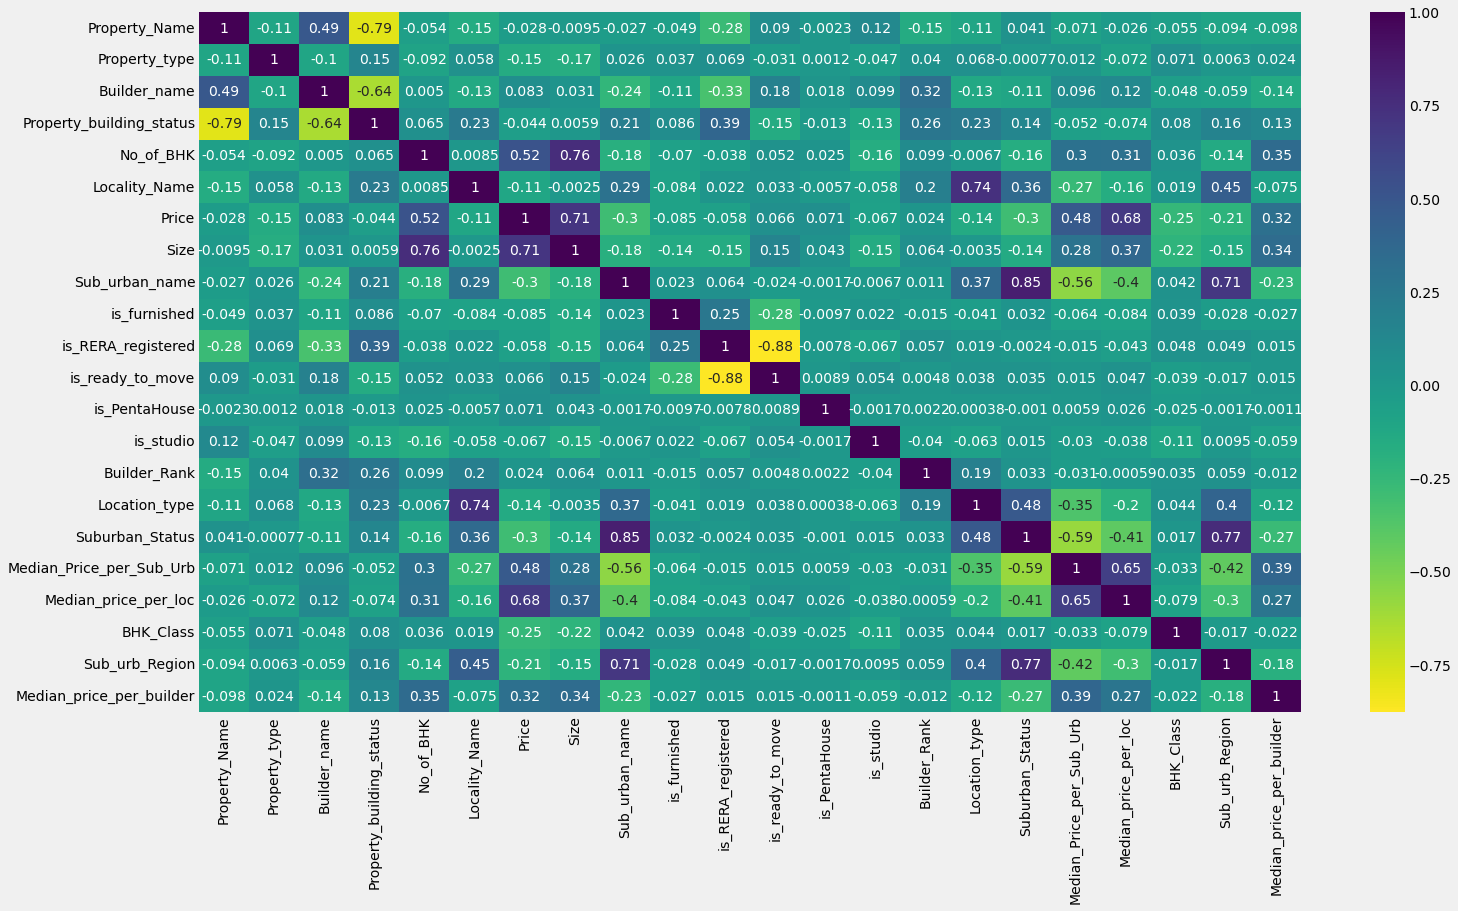

In [113]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis_r')
plt.show()

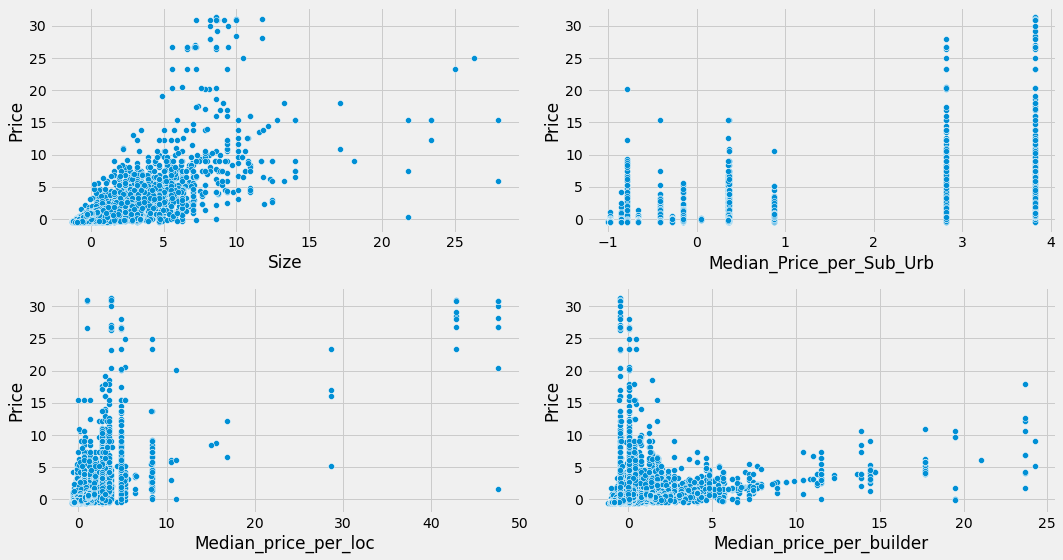

In [114]:
plt.figure(figsize=(15,8))
l = ['Size', 'Median_Price_per_Sub_Urb',
       'Median_price_per_loc', 'Median_price_per_builder']
R=2
C=2
c=1
for i in l:
    plt.subplot(R,C,c)
    sns.scatterplot(df.loc[:,i],df['Price'])
    c+=1
plt.tight_layout()
plt.show()

## Model Building

* We need to split the data into train and test in the ratio of 70:30

* We will build a base model first to check the metrics and important features 

In [115]:
df.head(2)

,Property_Name,Property_type,Builder_name,Property_building_status,No_of_BHK,Locality_Name,Price,Size,Sub_urban_name,is_furnished,is_RERA_registered,is_ready_to_move,is_PentaHouse,is_studio,Builder_Rank,Location_type,Suburban_Status,Median_Price_per_Sub_Urb,Median_price_per_loc,BHK_Class,Sub_urb_Region,Median_price_per_builder
0,0.000118,0.988019,0.000118,0.772365,2.0,0.016865,-0.035913,-0.343641,0.175525,0.659889,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.368832,0.103848,0.570784,0.621907,0.296356
1,0.000043,0.988019,0.000129,0.772365,3.0,0.114354,0.065989,-0.112615,0.128278,0.659889,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.152649,-0.117502,0.570784,0.621907,0.041456


In [116]:
df.shape

(93149, 22)

In [117]:
X = df.drop('Price',axis=1)
y = df.Price

In [118]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=0)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((65204, 21), (27945, 21), (65204,), (27945,))

**STATS MODEL:**

In [119]:
import statsmodels.api as sma
temp_train = sma.add_constant(xtrain)
mod = sma.OLS(ytrain,temp_train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     7201.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:24:16   Log-Likelihood:                -52961.
No. Observations:               65204   AIC:                         1.060e+05
Df Residuals:                   65182   BIC:                         1.062e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.6041      0.029     20.827      0.000       0.547       0.661
Property_Name               -3.6644      0.319    -11.481      0.000      -4.290      -3.039
Property_type               -0.2725      0.021    -13.132      0.000      -0.313      -0.232
Builder_name                 0.2864      0.082      3.510      0.000       0.126       0.446
Property_building_status    -0.2350      0.023    -10.047      0.000      -0.281      -0.189
No_of_BHK                   -0.0454      0.004    -11.302      0.000      -0.053      -0.038
Locality_Name               -0.6810      0.082     -8.338      0.000      -0.841      -0.521
Size                         0.5557      0.004    142.703      0.000       0.548       0.563
Sub_urban_name               0.9338      0.091     10.249      0.000       0.755       1.112
is_furnished                 0.1507      0.011     13.458      0.000       0.129       0.173
is_RERA_registered           0.1515      0.011     13.482      0.000       0.129       0.173
is_ready_to_move             0.0541      0.010      5.317      0.000       0.034       0.074
is_PentaHouse                3.5365      0.206     17.133      0.000       3.132       3.941
is_studio                    0.0928      0.014      6.549      0.000       0.065       0.121
Builder_Rank                 0.0008      0.008      0.097      0.923      -0.015       0.016
Location_type                0.0052      0.007      0.740      0.459      -0.009       0.019
Suburban_Status             -0.2358      0.012    -19.207      0.000      -0.260      -0.212
Median_Price_per_Sub_Urb     0.0191      0.003      5.613      0.000       0.012       0.026
Median_price_per_loc         0.4478      0.003    145.615      0.000       0.442       0.454
BHK_Class                   -0.6358      0.018    -35.682      0.000      -0.671      -0.601
Sub_urb_Region               0.2911      0.016     18.029      0.000       0.259       0.323
Median_price_per_builder     0.0142      0.003      5.657      0.000       0.009       0.019
==============================================================================
Omnibus:                   137536.900   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1549804420.721
Skew:                          17.986   Prob(JB):                         0.00
Kurtosis:                     757.421   Cond. No.                         434.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumptions of the Linear Regression Model


* We check the assumptions to make sure that the linear regression model is a good model. If any of the assumptions are violated, then linear regression is not a good model.
* Linerarity : That there should be a linear pattern between the predictors and target. **Statistical Test: Rainbow Test**

* Normality : That the Model Residuals should be Normal. **Statistical Test: jarque bera test**

* Multicollinearity: All the predictors should not be highly correlated. **Statistical Test: Correlation, Condition No & VIF**

* Autoccorelation of Errors: The errors should not be correlated. **Statistical Test: Durbin Watson test The Range of the DW Test is between 0-4 where the ideal value is 2 and the tolerance value is 1.5-2.5**

* Heteroscedasticity : That the data has unequal variance. **Statistical Test: Breusch Pagan Test**

**Linearity: Rainbow Test**

*Ho : There is no linear Relation b/w predictors and target variable.*

*Ha : There is a linear Relationship b/w predictors and target variable.*

In [120]:
sma.stats.linear_rainbow(mod)

(1.4805498984681433, 2.2557829862262876e-273)

Since p value is less than 0.05, we reject null hypothesis and we can say that linear relationship exists b/w predictors and target

**Normality : jarque bera test**

*Ho : the data is not normal*
    
*Ha : the data is normal*

In [121]:
stats.jarque_bera(mod.resid)

Jarque_beraResult(statistic=1549804420.720764, pvalue=0.0)

We reject the null hypothesis and conclude that the model residuals(error) are normally distributed. 

**MultiCollinearity:**

###### How to Check Multicollinearity
* Correlation ~ Heatmap
* Condition Number : If the CN is > 1000, We can say that the predictors are Highly collinear. If the CN is between 100-1000, then we can say that there is Moderate Collinearity
* Less than 100: Not so collinear

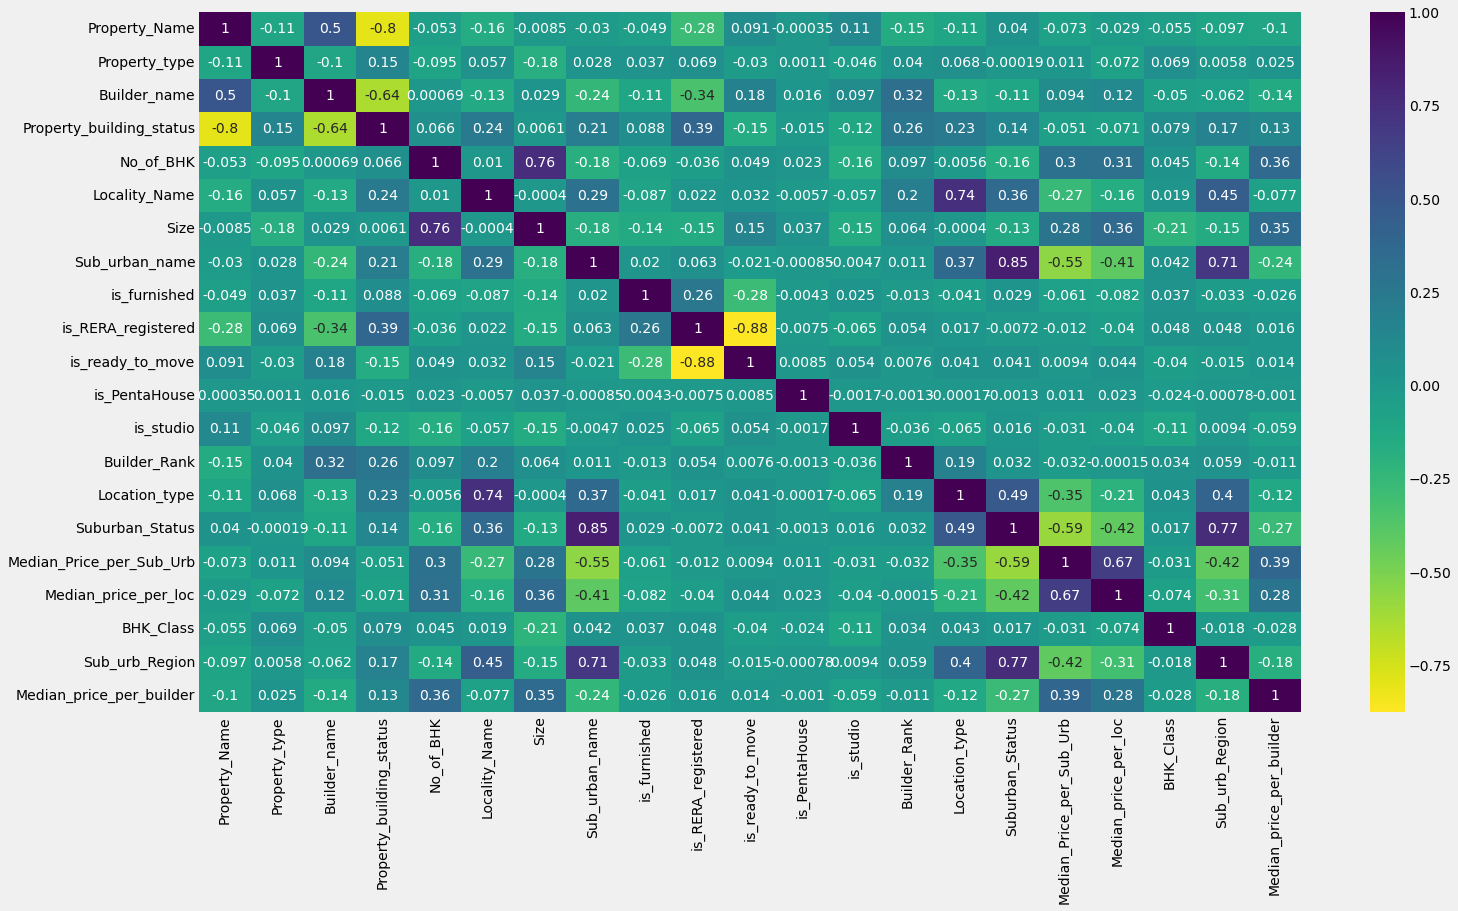

In [158]:
plt.figure(figsize=(22,12))
sns.heatmap(xtrain.corr(),annot=True,cmap='viridis_r')
plt.show()

Cond. No. is 439 so we can say there is moderate multicollinearity.

###### Variance Inflation Factor
* The difference between the condition number and the VIF is that the CN will only tell you that the data is highly collinear where as the VIF will tell you which features are highly collinear vs the others.

* **If the VIF Value > 10: Highl Correlated, 5-10: Moderately Correlated and between 1-5:No Correlation**

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_list=[]
for i in range(xtrain.shape[1]):
    vif_list.append(variance_inflation_factor(xtrain.values, i))
    
pd.DataFrame({'Features': xtrain.columns,'VIF':vif_list}).sort_values(by = 'VIF', ascending=False)

,Features,VIF
1,Property_type,52.332939
3,Property_building_status,46.597566
7,Sub_urban_name,35.280296
15,Suburban_Status,24.804030
18,BHK_Class,16.086640
4,No_of_BHK,15.312808
19,Sub_urb_Region,14.145068
10,is_ready_to_move,12.788930
9,is_RERA_registered,9.140479
8,is_furnished,8.079560


###### Heteroscedasticity
* It means unequal variance.
* Test - BreuschPagan Test


* *Ho: That there is no Equal Variance Present in the Data/Model*

* *Ha: Ho is False.*

In [124]:
import statsmodels.stats.api as ssa
# mod.exog: It represents all the data points/input variables

ssa.het_breuschpagan(mod.resid, mod.model.exog)
# Inf: Since the PValue < 0.05, We reject Ho

(6037.866883424457, 0.0, 316.7515398426116, 0.0)

We reject the null hypothesis and conclude that there is equal variance in the model

##### Autoccorelation of Errors: 
The errors should not be correlated. Statistical Test: Durbin Watson test The Range of the DW Test is between 0-4 where the ideal value is 2 and the tolerance value is 1.5-2.5

In [125]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(mod.resid)

2.0019534203088614

We have the Durbin Watson value as 2 which is an ideal value and hence we can say that errors are not correlated.

**We can conclude that Linear Regression is a good model for our dataset since all the tests have been passed successfully.**

### Base and Advanced Model Building

**Linear Regression:**

In [126]:
from sklearn.metrics import r2_score, mean_squared_error
#Create the Machine Instance
lr = LinearRegression()
pred_train = lr.fit(xtrain, ytrain).predict(xtrain)
pred_test = lr.fit(xtrain,ytrain).predict(xtest)
#R2 Score
r2_lr = lr.score(xtest,ytest)
print('R Squared: ',r2_lr)
n = xtrain.shape[0]
k = xtrain.shape[1]
r_sq_adj_lr = 1 - ((1-r2_lr)*(n-1)/(n-k-1))
print('Adj.R Squared:',r_sq_adj_lr)
#Check the error
RMSE_lr = np.sqrt(mean_squared_error(ytest,pred_test))
print('RMSE: ',RMSE_lr)
diff_lr = np.sqrt(mean_squared_error(ytrain,pred_train))-np.sqrt(mean_squared_error(ytest,pred_test))
print('Diff on RMSE b/w Train and Test',diff_lr)

R Squared:  0.7753651864691881
Adj.R Squared: 0.7752928147855308
RMSE:  0.4812759325926873
Diff on RMSE b/w Train and Test 0.06387157665922305


**Interpretation:** We get a R2 value of 0.77 for Linear Regression. To reduce overfitting we will use Regularization Approach

**Visualizing the change in values of coefficients obtained from the Above Model:**

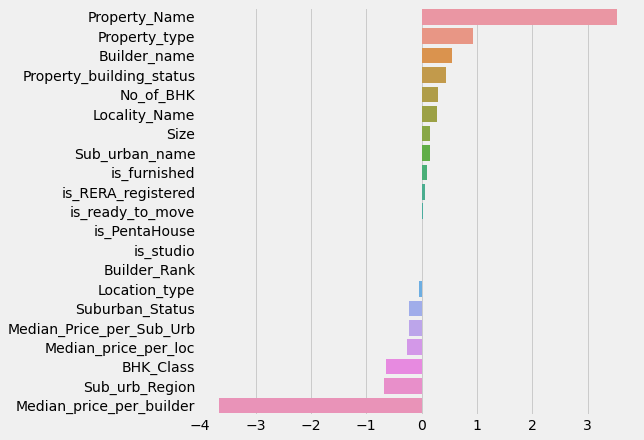

In [127]:
coeff_lr = sorted(lr.coef_,reverse=True)
plt.figure(figsize=(7,7))
sns.barplot(x=coeff_lr,y=X.columns)
plt.show()

**Linear Regression Using the Best Features done by SFE (Sequential Feature Selector) :**

In [128]:
from mlxtend.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(estimator = lr, k_features = 'best',forward = True, scoring = 'r2')
sfs.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 21),
                          scoring='r2')

In [129]:
sfs.k_feature_names_

('Locality_Name',
 'Size',
 'Sub_urban_name',
 'is_furnished',
 'is_RERA_registered',
 'is_PentaHouse',
 'is_studio',
 'Location_type',
 'Suburban_Status',
 'Median_price_per_loc',
 'BHK_Class',
 'Sub_urb_Region')

In [130]:
#Print the list of best features
sfs_train = xtrain.loc[:, sfs.k_feature_names_]
sfs_test = xtest.loc[:, sfs.k_feature_names_]

In [131]:
sfsmodel = sma.OLS(ytrain, sfs_train).fit()

pred = sfsmodel.predict(sfs_test)

#sfsmodel.summary()

sfs_rmse = np.sqrt(mean_squared_error(ytest, pred))
sfs_r2 = sfsmodel.rsquared
n = sfs_train.shape[0]
k = sfs_train.shape[1]
r_sq_adj_sfs = 1 - ((1-sfs_r2)*(n-1)/(n-k-1))
print('RMSE:',sfs_rmse)
print('R Squared:',sfs_r2)
print('Adj.R Squared:',r_sq_adj_sfs)

RMSE: 0.4828635428694899
R Squared: 0.6943186275566247
Adj.R Squared: 0.6942623594142534


### Gradient Descent : Stochastic Gradient Descent

**Build a LR model using SGD method.**

In [132]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state = 10)
ypred_SGD = sgd.fit(xtrain,ytrain).predict(xtest)
ypred_SGD

array([-0.3982752 , -0.27211018, -0.49473694, ..., -0.36680222,
       -0.70052462, -0.49166259])

In [133]:
sgd_rmse = np.sqrt(mean_squared_error(ytest, ypred_SGD))
print('RMSE:',sgd_rmse)
r2_sgd = r2_score(ytest, ypred_SGD)
print('R Squared:',r2_sgd)
n = xtrain.shape[0]
k = xtrain.shape[1]
r_sq_adj_sgd = 1 - ((1-r2_sgd)*(n-1)/(n-k-1))
print('Adj.R Squared:',r_sq_adj_sgd)

RMSE: 0.48345425985404467
R Squared: 0.773327122683619
Adj.R Squared: 0.7732540943871009


Visualizing the change in values of coefficients obtained from the Above Model:


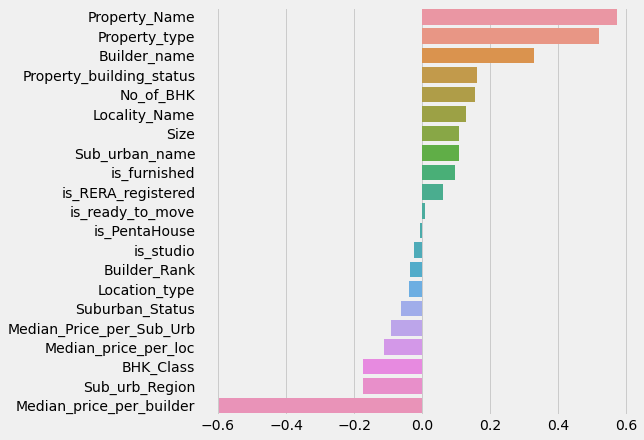

In [134]:
coeff_sgd = sorted(sgd.coef_,reverse=True)
plt.figure(figsize=(7,7))
sns.barplot(x=coeff_sgd,y=X.columns)
print('Visualizing the change in values of coefficients obtained from the Above Model:')
plt.show()

### Regularization:

One way to deal with the overfitting problem is by adding the Regularization to the model.

### Ridge Regression:

In [135]:
ridge = Ridge(alpha = 1.0,max_iter = 500)
ypred_ridge = ridge.fit(xtrain, ytrain).predict(xtest)
ypred_ridge

array([-0.4051443 , -0.29231612, -0.47280823, ..., -0.32753712,
       -0.67057698, -0.43442711])

In [136]:
ridge_rmse  = np.sqrt(mean_squared_error(ytest, ypred_ridge))
print('RMSE:',ridge_rmse)
r2_ridge = r2_score(ytest, ypred_ridge)
print('R Squared:',r2_ridge)
n = xtrain.shape[0]
k = xtrain.shape[1]
r_sq_adj_ridge = 1 - ((1-r2_ridge)*(n-1)/(n-k-1))
print('Adj.R Squared:',r_sq_adj_ridge)

RMSE: 0.48106442690878737
R Squared: 0.7755625830009097
Adj.R Squared: 0.7754902749134472


Visualizing the change in values of coefficients obtained from the Above Model:


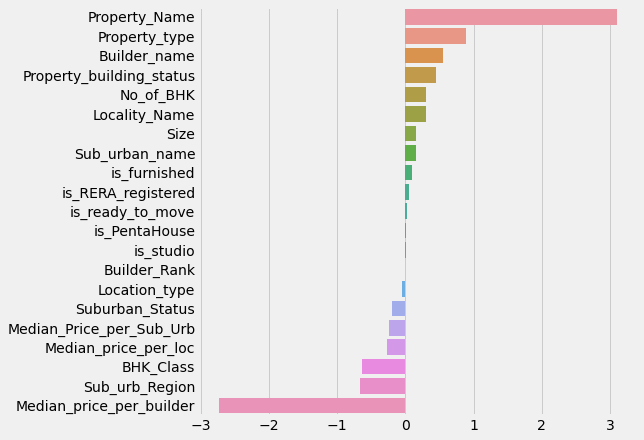

In [137]:
coeff_ridge = sorted(ridge.coef_,reverse=True)
plt.figure(figsize=(7,7))
sns.barplot(x=coeff_ridge,y=X.columns)
print('Visualizing the change in values of coefficients obtained from the Above Model:')
plt.show()

## Lasso Regression:

In [138]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
ypred_lasso = lasso.fit(xtrain, ytrain).predict(xtest)
ypred_lasso

array([-0.39561452, -0.30526352, -0.5153543 , ..., -0.311627  ,
       -0.54275034, -0.58678641])

In [139]:
lasso_rmse  = np.sqrt(mean_squared_error(ytest, ypred_lasso))
print('RMSE:',lasso_rmse)
r2_lasso = r2_score(ytest, ypred_lasso)
print('R Squared:',r2_lasso)
n = xtrain.shape[0]
k = xtrain.shape[1]
r_sq_adj_lasso = 1 - ((1-r2_lasso)*(n-1)/(n-k-1))
print('Adj.R Squared:',r_sq_adj_lasso)

RMSE: 0.4907546742541724
R Squared: 0.7664296753033454
Adj.R Squared: 0.7663544248228656


Visualizing the change in values of coefficients obtained from the Above Model:


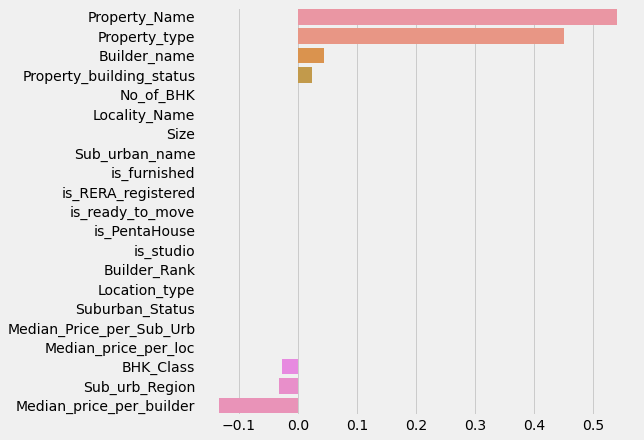

In [140]:
coeff_lasso = sorted(lasso.coef_,reverse=True)
plt.figure(figsize=(7,7))
sns.barplot(x=coeff_lasso,y=X.columns)
print('Visualizing the change in values of coefficients obtained from the Above Model:')
plt.show()

### Elastic Net Regression:

In [141]:
from sklearn.linear_model import ElasticNet
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'

enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)
ypred_enet = enet.fit(xtrain,ytrain).predict(xtest)
ypred_enet

array([-0.37723226, -0.32140334, -0.5024869 , ..., -0.30768827,
       -0.47645144, -0.57517718])

In [142]:
enet_rmse  = np.sqrt(mean_squared_error(ytest, ypred_enet))
print('RMSE:',enet_rmse)
r2_enet = r2_score(ytest, ypred_enet)
print('R Squared:',r2_enet)
n = xtrain.shape[0]
k = xtrain.shape[1]
r_sq_adj_enet = 1 - ((1-r2_enet)*(n-1)/(n-k-1))
print('Adj.R Squared:',r_sq_adj_enet)

RMSE: 0.49996832688143794
R Squared: 0.7575770342503004
Adj.R Squared: 0.757498931671663


Visualizing the change in values of coefficients obtained from the Above Model:


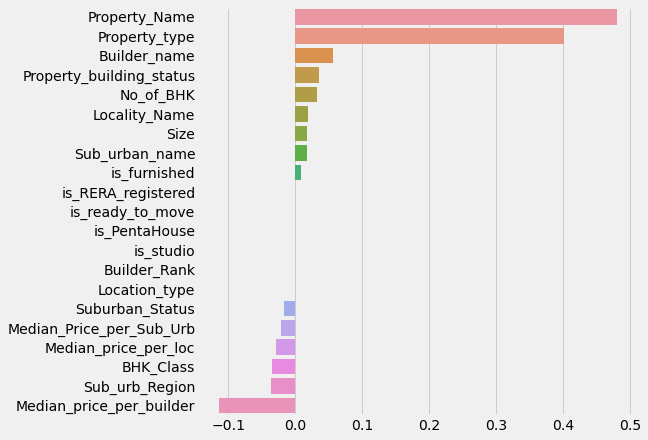

In [143]:
coeff_enet = sorted(enet.coef_,reverse=True)
plt.figure(figsize=(7,7))
sns.barplot(x=coeff_enet,y=X.columns)
print('Visualizing the change in values of coefficients obtained from the Above Model:')
plt.show()

### GridSearchCV:

Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. 

### Find optimal value of alpha for Elastic Net Regression

In [144]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
enet_grid.fit(xtrain, ytrain)
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.0001} 



In [145]:
ypred_enet_grid = enet_grid.fit(xtrain, ytrain).predict(xtest)

In [146]:
enet_grid_rmse  = np.sqrt(mean_squared_error(ytest, ypred_enet_grid))
print('RMSE:',enet_grid_rmse)
r2_enet_grid = r2_score(ytest, ypred_enet_grid)
print('R Squared:',r2_enet_grid)
n = xtrain.shape[0]
k = xtrain.shape[1]
r_sq_adj_enet_grid = 1 - ((1-r2_enet_grid)*(n-1)/(n-k-1))
print('Adj.R Squared:',r_sq_adj_enet_grid)

RMSE: 0.4810436198211543
R Squared: 0.7755819973984457
Adj.R Squared: 0.7755096955658135


### Random Forest Regressor:

In [147]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500,min_samples_leaf=4,random_state=0)
ypred_rf = rf.fit(xtrain,ytrain).predict(xtest)
ypred_rf

array([-0.40076653, -0.28668575, -0.43412041, ..., -0.24111958,
       -0.27508596, -0.44943153])

In [148]:
rf_rmse  = np.sqrt(mean_squared_error(ytest, ypred_rf))
print('RMSE:',rf_rmse)
r2_rf = r2_score(ytest, ypred_rf)
print('R Squared:',r2_rf)
n = xtrain.shape[0]
k = xtrain.shape[1]
r_sq_adj_rf = 1 - ((1-r2_rf)*(n-1)/(n-k-1))
print('Adj.R Squared:',r_sq_adj_rf)

RMSE: 0.3354806789517508
R Squared: 0.8908499845642276
Adj.R Squared: 0.8908148191761733


#### XGBOOST WITH PARAMETERS:

In [149]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=2,n_estimators=49,reg_lambda=1.6)
ypred_xgb = xgb.fit(xtrain,ytrain).predict(xtest)
ypred_xgb

array([-0.35998732, -0.28310257, -0.4577621 , ..., -0.28126973,
       -0.358265  , -0.45170897], dtype=float32)

In [150]:
xgb_rmse  = np.sqrt(mean_squared_error(ytest, ypred_xgb))
print('RMSE:',xgb_rmse)
r2_xgb = r2_score(ytest, ypred_xgb)
print('R Squared:',r2_xgb)
n = xtrain.shape[0]
k = xtrain.shape[1]
r_sq_adj_xgb = 1 - ((1-r2_xgb)*(n-1)/(n-k-1))
print('Adj.R Squared:',r_sq_adj_xgb)

RMSE: 0.38941032445077395
R Squared: 0.8529369060560532
Adj.R Squared: 0.8528895260282415


### Stacked Model

In [151]:
from sklearn.ensemble import StackingRegressor
base = [('lr', lr), ('ridge',ridge), ('enet_grid',enet_grid), ('xgb',xgb)]
final = RandomForestRegressor(n_estimators=500, min_samples_leaf = 4, random_state = 0)
stack = StackingRegressor(estimators = base, final_estimator = final, cv = 5)
ypred_stack = stack.fit(xtrain,ytrain).predict(xtest)
ypred_stack

array([-0.35985086, -0.27319624, -0.42455771, ..., -0.26474882,
       -0.36038987, -0.44305234])

In [152]:
stack_rmse  = np.sqrt(mean_squared_error(ytest, ypred_stack))
print('RMSE:',stack_rmse)
r2_stack = r2_score(ytest, ypred_stack)
print('R Squared:',r2_stack)
n = xtrain.shape[0]
k = xtrain.shape[1]
r_sq_adj_stack = 1 - ((1-r2_stack)*(n-1)/(n-k-1))
print('Adj.R Squared:',r_sq_adj_stack)

RMSE: 0.4014398778165107
R Squared: 0.8437105011902946
Adj.R Squared: 0.843660148647031


**FULL REPORT ON METRICS OF ALL MODELS:**

In [153]:
final_report = pd.DataFrame(columns=['Model','RMSE','R-Squared','Adj-R-Squared'])
final_report['Model'] = ['Linear Regresssion','Linear Regression SFE(Best Features)','Stochastic Gradient Descent',
                        'Ridge Regression', 'Lasso regression', 'Elastic Net Regression:',
                         'Elastic Net Regression (Grid Search CV)','Random Forest Regressor','Xgboost with Parameters','Stacking Model Regressor']
final_report['RMSE'] = [RMSE_lr,sfs_rmse,sgd_rmse,ridge_rmse,lasso_rmse,enet_rmse,enet_grid_rmse,rf_rmse,xgb_rmse,stack_rmse]
final_report['R-Squared'] = [r2_lr,sfs_r2,r2_sgd,r2_ridge,r2_lasso,r2_enet,r2_enet_grid,r2_rf,r2_xgb,r2_stack]
final_report['Adj-R-Squared'] = [r_sq_adj_lr,r_sq_adj_sfs,r_sq_adj_sgd,r_sq_adj_ridge,r_sq_adj_lasso,r_sq_adj_enet
                                ,r_sq_adj_enet_grid,r_sq_adj_rf,r_sq_adj_xgb,r_sq_adj_stack]

In [154]:
final_report 

,Model,RMSE,R-Squared,Adj-R-Squared
0,Linear Regresssion,0.481276,0.775365,0.775293
1,Linear Regression SFE(Best Features),0.482864,0.694319,0.694262
2,Stochastic Gradient Descent,0.483454,0.773327,0.773254
3,Ridge Regression,0.481064,0.775563,0.775490
4,Lasso regression,0.490755,0.766430,0.766354
5,Elastic Net Regression:,0.499968,0.757577,0.757499
6,Elastic Net Regression (Grid Search CV),0.481044,0.775582,0.775510
7,Random Forest Regressor,0.335481,0.890850,0.890815
8,Xgboost with Parameters,0.389410,0.852937,0.852890
9,Stacking Model Regressor,0.401440,0.843711,0.843660


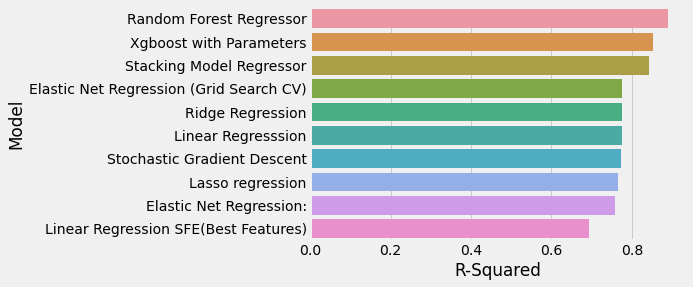

In [155]:
final_report_s = final_report.sort_values(by='R-Squared',ascending=False)
sns.barplot(final_report_s['R-Squared'],final_report_s['Model'])
plt.show()

**From the above model Metrics we can say that Random Forest has the best R-Squared and lowest error and performs effectively.
The important Features contributing to the model using RandomForest and Xgboost are shown Below:**

**Random Forest Important Features:**

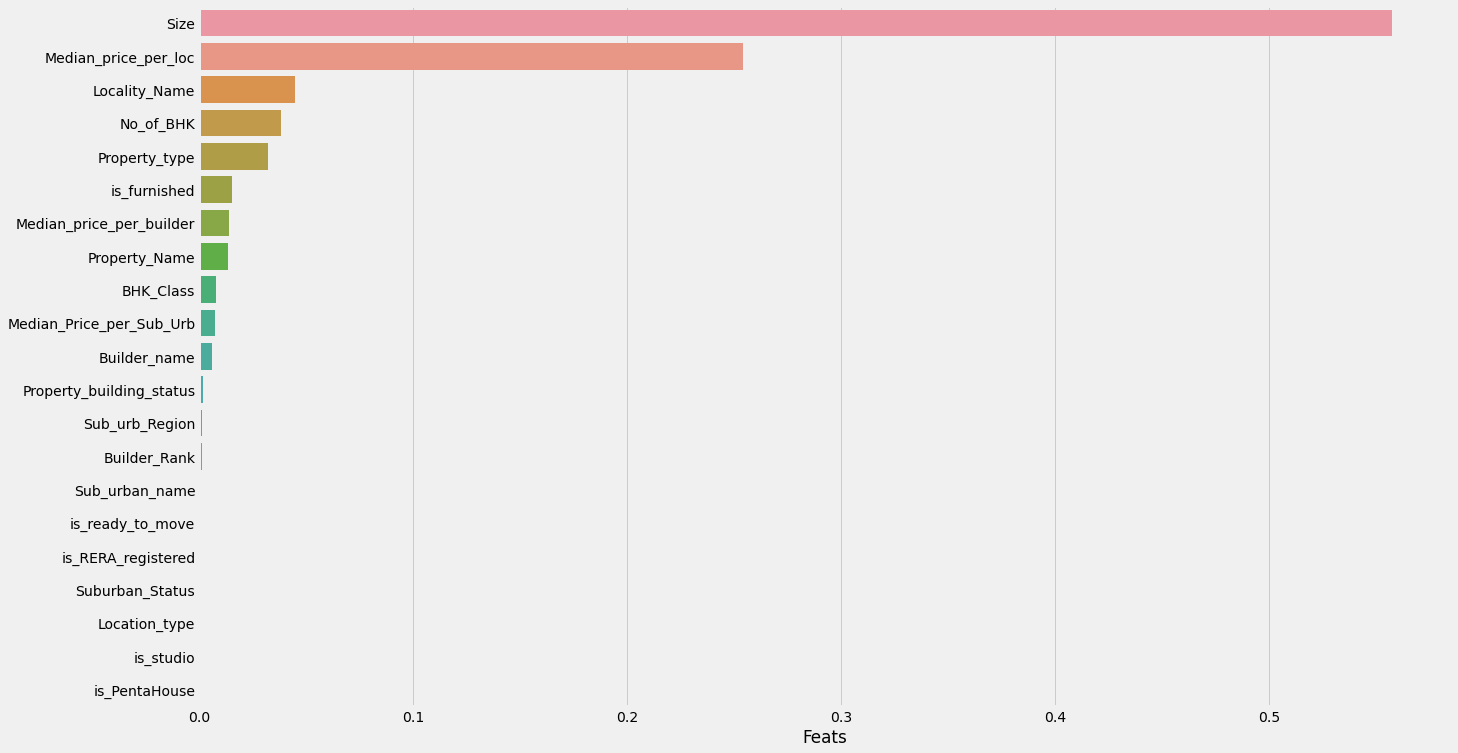

In [156]:
plt.figure(figsize=(20,12))
rf_imp_feat = pd.DataFrame(rf.feature_importances_, index = xtest.columns, columns = ['Feats']).sort_values(by='Feats',ascending=False)
sns.barplot(x=rf_imp_feat['Feats'],y=rf_imp_feat.index)
plt.show()

**Xgboost Important Features:**

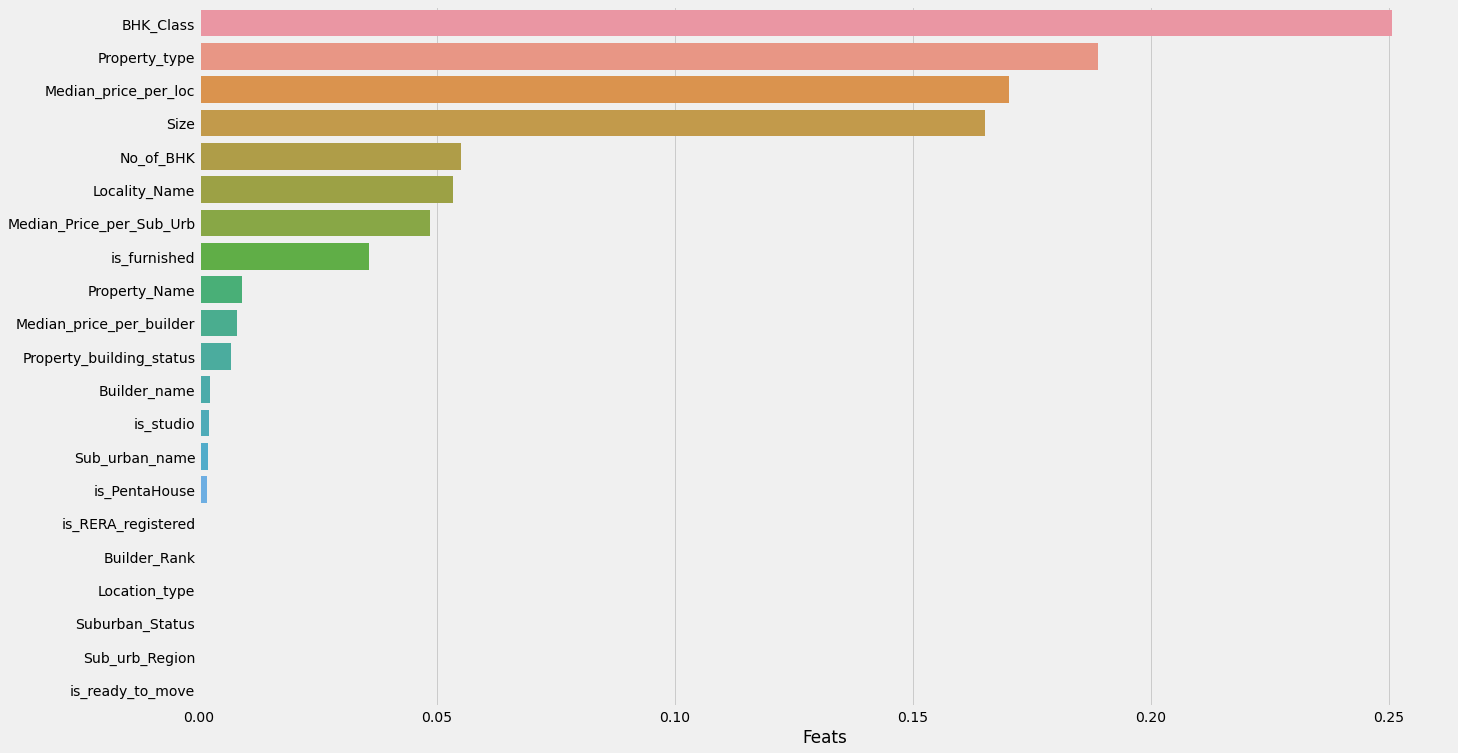

In [157]:
plt.figure(figsize=(20,12))
xgb_imp_feat = pd.DataFrame(xgb.feature_importances_, index = xtest.columns, columns = ['Feats']).sort_values(by='Feats',ascending=False)
sns.barplot(x=xgb_imp_feat['Feats'],y=xgb_imp_feat.index)
plt.show()

* **The Findings from all the models suggest that Random Forest is the best model for Predicting House Prices in Mumbai.**
* **Size, Location wise Price, No of Rooms, Location in the city and status of construction (furnished/not) play a huge role in deciding the price of the house.**

# Business Recommendations : 

* Based on our feature analysis, we can understand the Price varies across various regions of Mumbai.
* South Mumbai is the most expensive among All Regions and North Mumbai is the Least Expensive region. 
* Central and East Mumbai are economical options with west Mumbai being moderately economical.  

* Hence we can conclude that customers can look for West, Central and East Mumbai for best Priced Houses. 